In [33]:
%matplotlib inline

import glob
import os
import random
import json
import pickle
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

from astropy.table import Table
import rubin_sim.maf.db as db
from local_opsdb_patch import OpsimDatabase #local
from rubin_sim.maf.utils import m52snr
import rubin_sim.maf.metrics as metrics
import rubin_sim.maf.plots as plots

import rubin_sim.maf.slicers as slicers
import rubin_sim.maf.metric_bundles as metric_bundles
from astropy.cosmology import z_at_value
from rubin_sim.maf.metrics import BaseMetric
from rubin_sim.maf.slicers import UserPointsSlicer
from rubin_sim.maf.metric_bundles import MetricBundle, MetricBundleGroup
from rubin_sim.maf.db import ResultsDb
import rubin_sim.maf.utils as maf_utils
import rubin_sim.maf.metrics as metrics
from rubin_sim.maf.plots import HealpixSkyMap
import rubin_sim.maf.plots as plots

#from rubin_sim.utils import equatorialFromGalactic, hpid2RaDec, _healbin, healbin
from astropy.coordinates import Galactic, ICRS
import astropy.units as u
import healpy as hp

from rubin_sim.phot_utils import DustValues

dust_model = DustValues()
#from rubin_sim.utils import getPackageDir
from importlib import resources

def getPackageDir(pkg_name):
    try:
        return resources.files(pkg_name).parent
    except Exception as e:
        raise RuntimeError(f"Could not find package {pkg_name}: {e}")

In [42]:
import sys
import importlib

# Clear the module from cache
if "local_GRBafterglows_metric" in sys.modules:
    del sys.modules["local_GRBafterglows_metric"]

# Re-import and reload the updated module
import local_GRBafterglows_metric
importlib.reload(local_GRBafterglows_metric)

# Import updated classes and functions from the refactored module
from local_GRBafterglows_metric import (
    GRBAfterglowLC,
    GRBAfterglowDetectMetric,
    generateGRBPopSlicer
)


# Confirm path
print(local_GRBafterglows_metric.__file__)

# Filter utility: select events within t_start and t_end range
def filter_population_by_time(slicer, t_start, t_end):
    peak_times = slicer.slice_points['peak_time']
    mask = (peak_times >= t_start) & (peak_times < t_end)
    ra = slicer.slice_points['ra'][mask]
    dec = slicer.slice_points['dec'][mask]
    print("Filtered Dec sample (rad):", dec[:10])
    new_slicer = metric_bundles.UserPointsSlicer(ra=ra, dec=dec, badval=0)
    new_slicer.slice_points = {k: v[mask] for k, v in slicer.slice_points.items()}
    return new_slicer


/Users/andradenebula/Documents/Research/Transient_Metrics/Stuff/AllTransient/local_GRBafterglows_metric.py


Loaded GRB afterglow templates from GRBAfterglow_templates.pkl
Loaded GRB population from AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/GRB_population_fixedpop_10yr_rd1em06.pkl
Injecting population using rate_density = 1.0e-06

=== Running GRB Detect-only for cadence: four_roll_v4.3.1_10yrs ===

 Year 1: 1-365 days
Sample Decs for four_roll_v4.3.1_10yrs, Year 1: [-58.24370758 -62.74411164 -66.1208334  -62.76790923 -63.84902273
 -57.12473915 -59.5082223  -65.60530746 -53.44912687 -74.83623871]
Injected GRBs in year 1: 4109


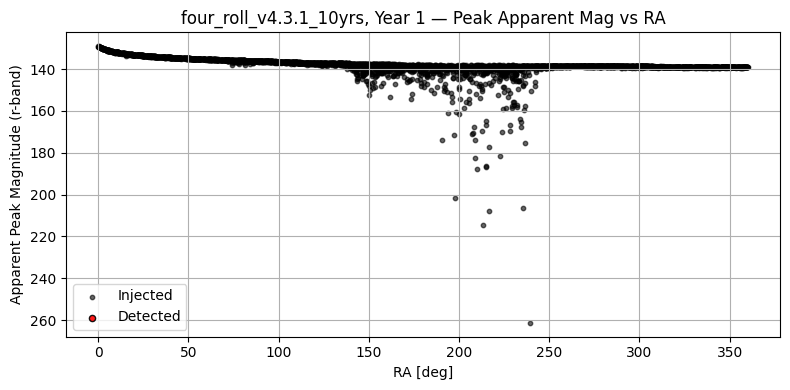

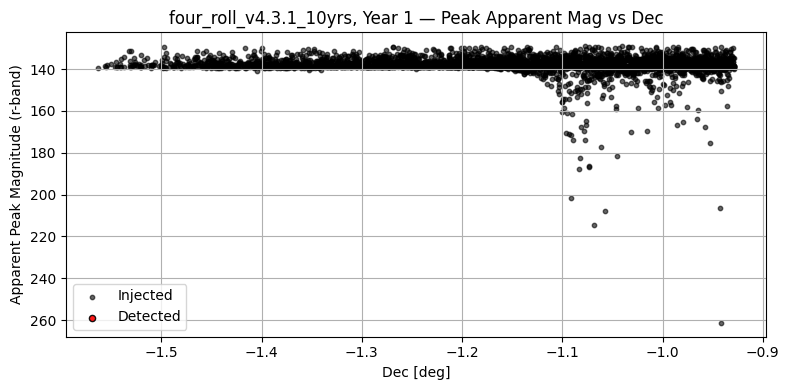


 Out of 4109 simulated GRB events, Rubin detected 0 under the four_roll_v4.3.1_10yrs cadence.
   Of those, each event was observed in an average of 0.0 ± 0.0 filters.

 Filter-wise detections for four_roll_v4.3.1_10yrs, Year 1:
  u-band: 0 detections
  g-band: 0 detections
  r-band: 0 detections
  i-band: 0 detections
  z-band: 0 detections
  y-band: 0 detections
Saved detection summary to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/four_roll_v4.3.1_10yrs_rd1em06_combined_detection_summary.csv
Dec (rad) before mollview theta conversion: [-1.01654447 -1.09509133 -1.15402625 -1.09550668 -1.11437567 -0.99701478
 -1.03861441 -1.14502862 -0.93286325 -1.30613877]
Theta range (mollview): 2.4993338895702824 3.1343036580469836
Any bad theta? False
Sample Decs (deg) for plotted map: [-58.24370758 -62.74411164 -66.1208334  -62.76790923 -63.84902273
 -57.12473915 -59.5082223  -65.60530746 -53.44912687 -74.83623871]


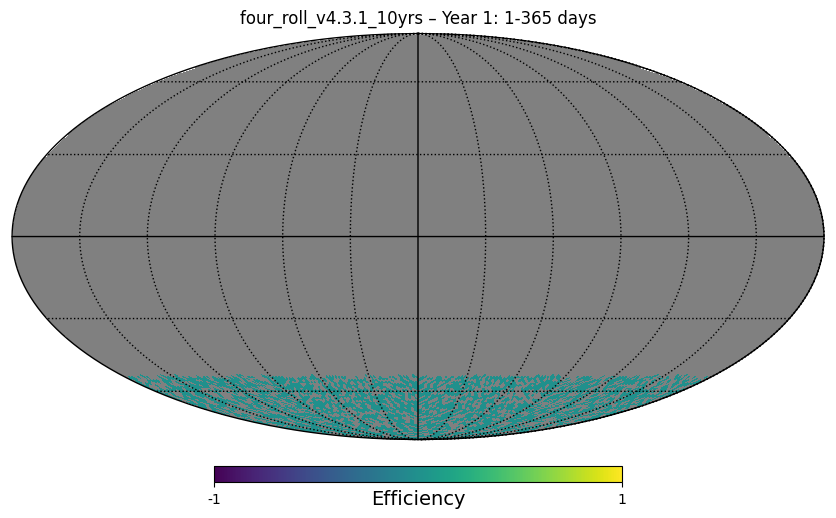

Saved mollview to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/four_roll_v4.3.1_10yrs_rd1em06_mollview_year1.png

 Year 2: 365-730 days
Sample Decs for four_roll_v4.3.1_10yrs, Year 2: [-37.58961361 -46.04753697 -43.6507887  -39.75546805 -41.92472403
 -41.92647465 -50.37255325 -39.20626852 -43.30166634 -47.20995375]
Injected GRBs in year 2: 4124


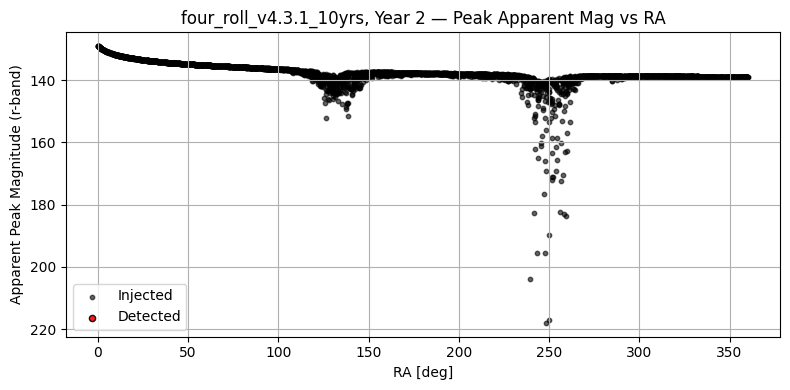

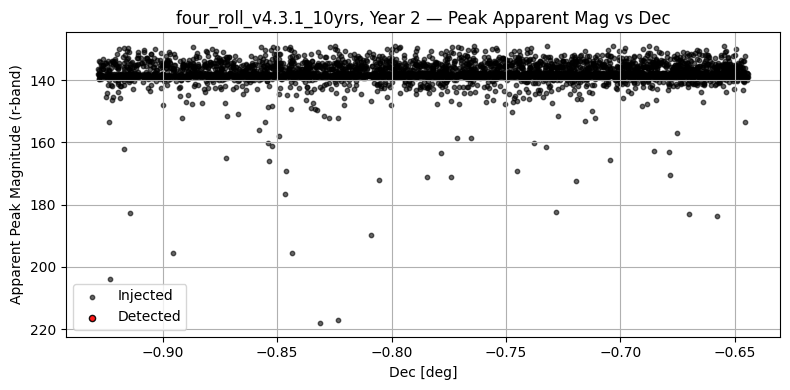


 Out of 4124 simulated GRB events, Rubin detected 0 under the four_roll_v4.3.1_10yrs cadence.
   Of those, each event was observed in an average of 0.0 ± 0.0 filters.

 Filter-wise detections for four_roll_v4.3.1_10yrs, Year 2:
  u-band: 0 detections
  g-band: 0 detections
  r-band: 0 detections
  i-band: 0 detections
  z-band: 0 detections
  y-band: 0 detections
Saved detection summary to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/four_roll_v4.3.1_10yrs_rd1em06_combined_detection_summary.csv
Dec (rad) before mollview theta conversion: [-0.65606252 -0.80368113 -0.76184998 -0.69386381 -0.73172447 -0.73175503
 -0.87916691 -0.68427847 -0.75575665 -0.82396913]
Theta range (mollview): 2.2151239355329246 2.499023104513375
Any bad theta? False
Sample Decs (deg) for plotted map: [-37.58961361 -46.04753697 -43.6507887  -39.75546805 -41.92472403
 -41.92647465 -50.37255325 -39.20626852 -43.30166634 -47.20995375]


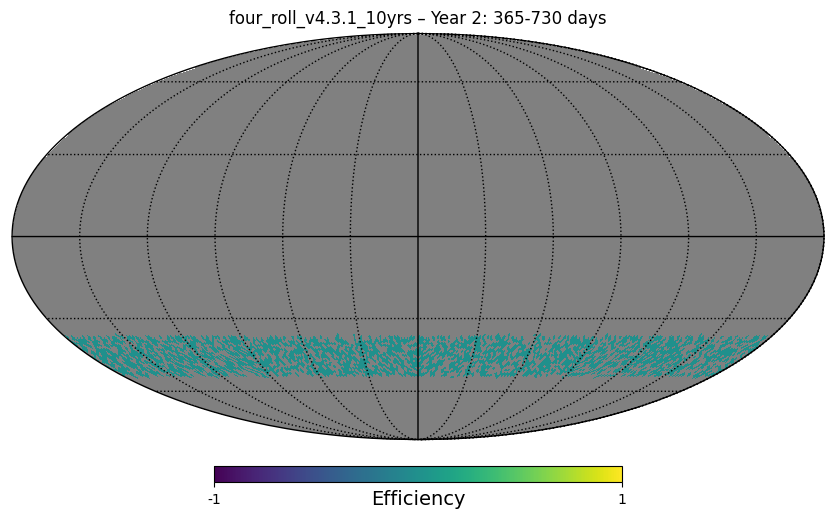

Saved mollview to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/four_roll_v4.3.1_10yrs_rd1em06_mollview_year2.png

 Year 3: 730-1095 days
Sample Decs for four_roll_v4.3.1_10yrs, Year 3: [-27.92413575 -25.2157328  -29.76373461 -30.98287387 -28.70089609
 -24.05734133 -29.84795275 -25.27793875 -31.97683347 -30.95558331]
Injected GRBs in year 3: 4185


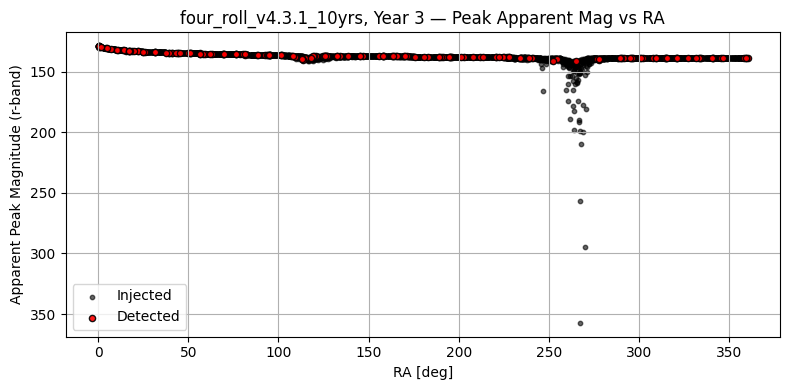

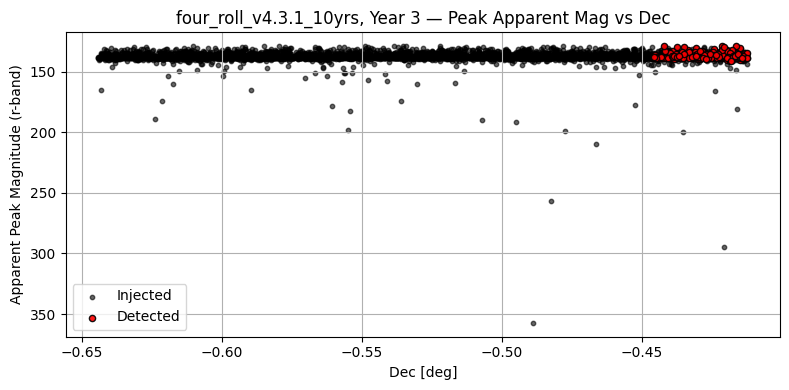


 Out of 4185 simulated GRB events, Rubin detected 180 under the four_roll_v4.3.1_10yrs cadence.
   Of those, each event was observed in an average of 2.0 ± 1.2 filters.

 Filter-wise detections for four_roll_v4.3.1_10yrs, Year 3:
  u-band: 60 detections
  g-band: 90 detections
  r-band: 92 detections
  i-band: 36 detections
  z-band: 48 detections
  y-band: 29 detections
Saved detection summary to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/four_roll_v4.3.1_10yrs_rd1em06_combined_detection_summary.csv
Dec (rad) before mollview theta conversion: [-0.48736811 -0.44009756 -0.51947517 -0.54075316 -0.50092514 -0.41987982
 -0.52094505 -0.44118326 -0.55810103 -0.54027685]
Theta range (mollview): 1.983119363016083 2.215001968097945
Any bad theta? False
Sample Decs (deg) for plotted map: [-27.92413575 -25.2157328  -29.76373461 -30.98287387 -28.70089609
 -24.05734133 -29.84795275 -25.27793875 -31.97683347 -30.95558331]


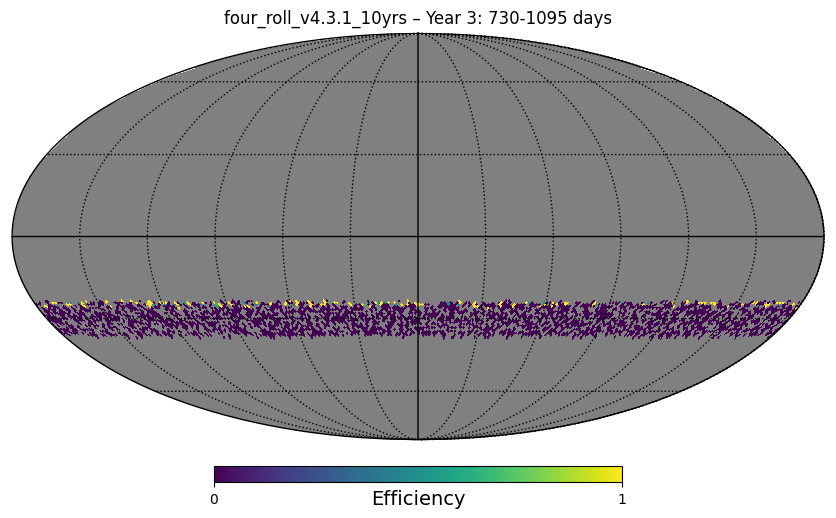

Saved mollview to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/four_roll_v4.3.1_10yrs_rd1em06_mollview_year3.png

 Year 4: 1095-1460 days
Sample Decs for four_roll_v4.3.1_10yrs, Year 4: [-13.58382677 -11.58830225 -12.55673759 -11.60792824 -13.05605594
 -17.3943472  -14.78942126 -13.72908707 -21.11447798 -17.1822162 ]
Injected GRBs in year 4: 4095


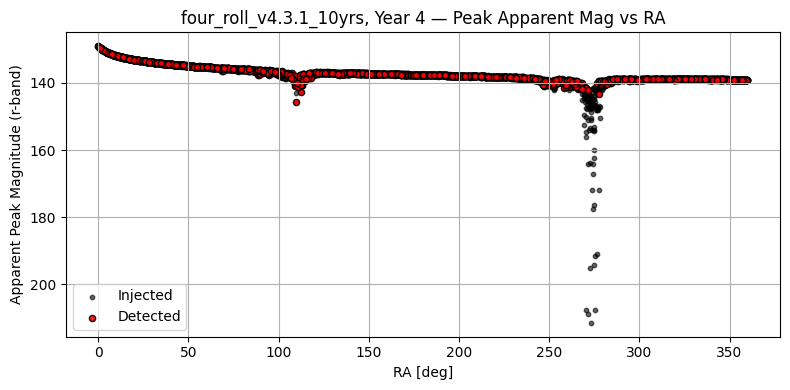

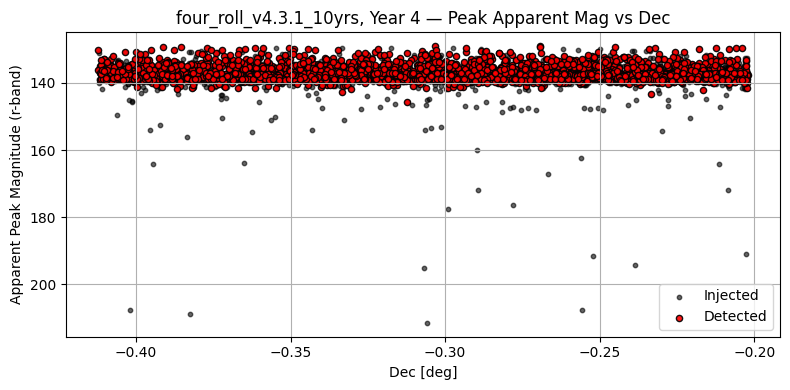


 Out of 4095 simulated GRB events, Rubin detected 2601 under the four_roll_v4.3.1_10yrs cadence.
   Of those, each event was observed in an average of 2.7 ± 1.5 filters.

 Filter-wise detections for four_roll_v4.3.1_10yrs, Year 4:
  u-band: 570 detections
  g-band: 821 detections
  r-band: 1482 detections
  i-band: 1453 detections
  z-band: 1388 detections
  y-band: 1184 detections
Saved detection summary to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/four_roll_v4.3.1_10yrs_rd1em06_combined_detection_summary.csv
Dec (rad) before mollview theta conversion: [-0.2370825  -0.20225403 -0.21915641 -0.20259657 -0.22787116 -0.30358863
 -0.2581241  -0.23961777 -0.36851716 -0.29988625]
Theta range (mollview): 1.772951282466711 1.9830346782634376
Any bad theta? False
Sample Decs (deg) for plotted map: [-13.58382677 -11.58830225 -12.55673759 -11.60792824 -13.05605594
 -17.3943472  -14.78942126 -13.72908707 -21.11447798 -17.1822162 ]


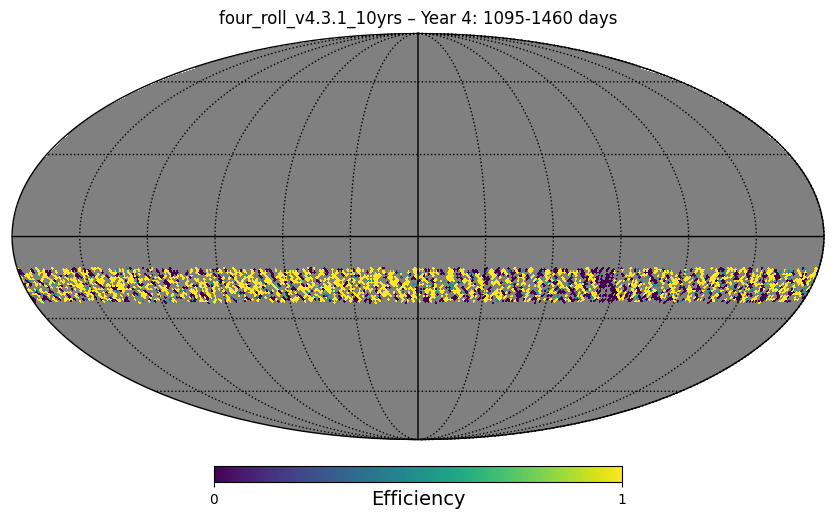

Saved mollview to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/four_roll_v4.3.1_10yrs_rd1em06_mollview_year4.png

 Year 5: 1460-1825 days
Sample Decs for four_roll_v4.3.1_10yrs, Year 5: [ -8.8026824   -1.84018935 -11.18643964  -5.86130526 -11.26196794
  -5.88085559  -5.23322161  -8.49817819 -11.14144693 -11.38996071]
Injected GRBs in year 5: 4255


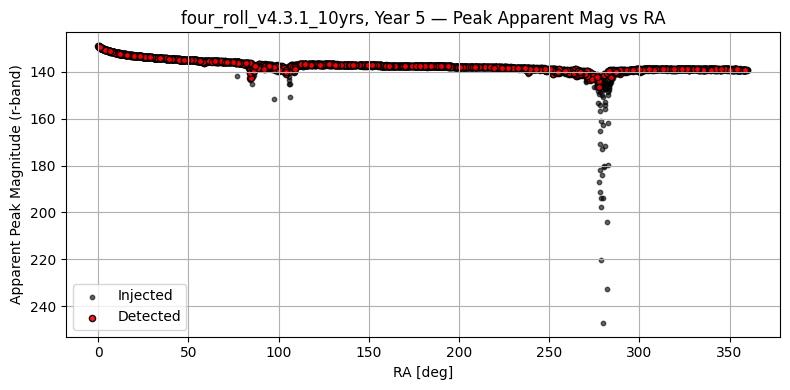

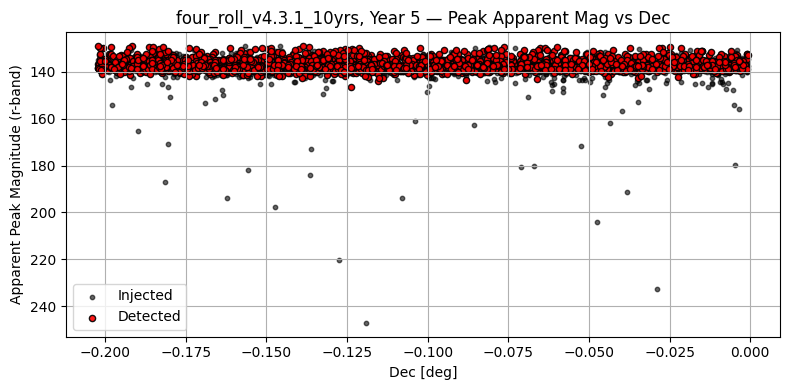


 Out of 4255 simulated GRB events, Rubin detected 2664 under the four_roll_v4.3.1_10yrs cadence.
   Of those, each event was observed in an average of 2.6 ± 1.4 filters.

 Filter-wise detections for four_roll_v4.3.1_10yrs, Year 5:
  u-band: 337 detections
  g-band: 857 detections
  r-band: 1692 detections
  i-band: 1488 detections
  z-band: 1369 detections
  y-band: 1074 detections
Saved detection summary to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/four_roll_v4.3.1_10yrs_rd1em06_combined_detection_summary.csv
Dec (rad) before mollview theta conversion: [-0.15363579 -0.03211736 -0.1952402  -0.10229908 -0.19655842 -0.10264029
 -0.09133695 -0.14832119 -0.19445493 -0.19879232]
Theta range (mollview): 1.571621201400821 1.7729350845151028
Any bad theta? False
Sample Decs (deg) for plotted map: [ -8.8026824   -1.84018935 -11.18643964  -5.86130526 -11.26196794
  -5.88085559  -5.23322161  -8.49817819 -11.14144693 -11.38996071]


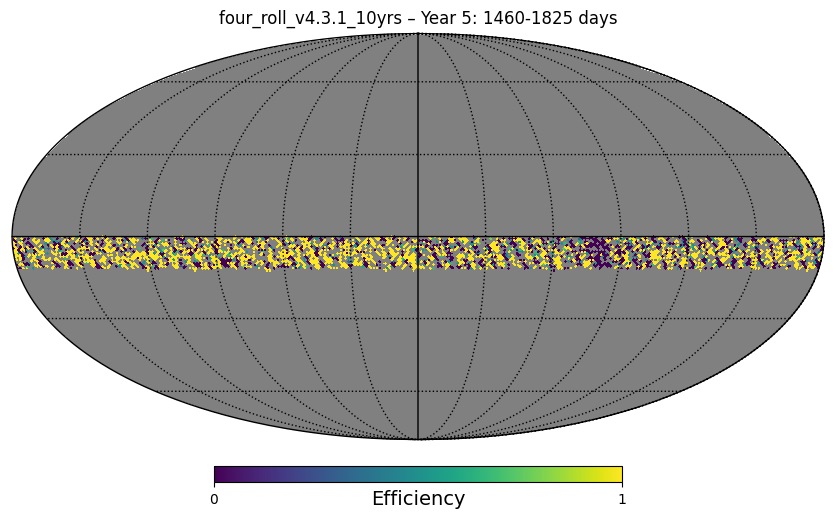

Saved mollview to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/four_roll_v4.3.1_10yrs_rd1em06_mollview_year5.png

 Year 6: 1825-2190 days
Sample Decs for four_roll_v4.3.1_10yrs, Year 6: [ 6.67141157  9.30215232  4.27979194  0.72633493  9.62577437  9.90684113
  6.51231332 11.30836593 10.70815281  3.54546425]
Injected GRBs in year 6: 4266


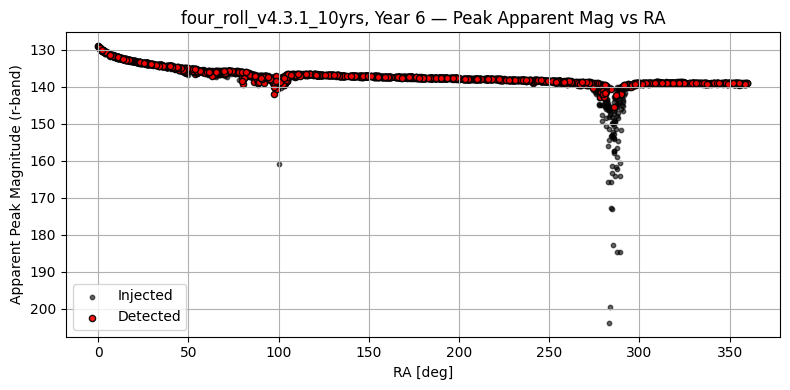

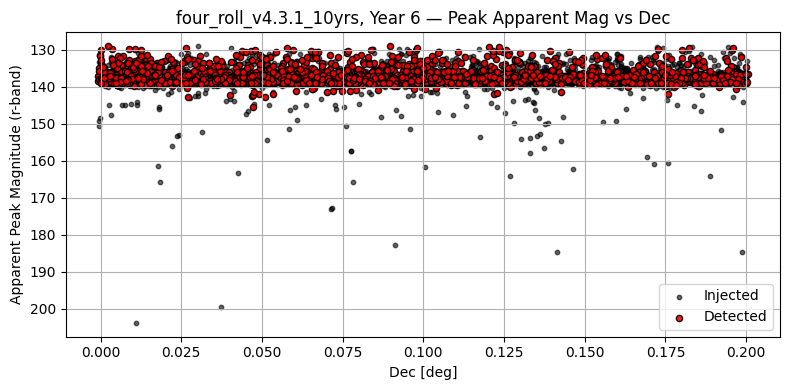


 Out of 4266 simulated GRB events, Rubin detected 1822 under the four_roll_v4.3.1_10yrs cadence.
   Of those, each event was observed in an average of 2.4 ± 1.4 filters.

 Filter-wise detections for four_roll_v4.3.1_10yrs, Year 6:
  u-band: 231 detections
  g-band: 677 detections
  r-band: 1033 detections
  i-band: 1002 detections
  z-band: 817 detections
  y-band: 648 detections
Saved detection summary to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/four_roll_v4.3.1_10yrs_rd1em06_combined_detection_summary.csv
Dec (rad) before mollview theta conversion: [0.1164381  0.16235319 0.07469646 0.01267694 0.16800146 0.172907
 0.11366131 0.19736822 0.18689252 0.06188002]
Theta range (mollview): 1.3703747062788287 1.5715017138148422
Any bad theta? False
Sample Decs (deg) for plotted map: [ 6.67141157  9.30215232  4.27979194  0.72633493  9.62577437  9.90684113
  6.51231332 11.30836593 10.70815281  3.54546425]


/var/folders/tp/cclflcq51yqbq43tdzvfqh_c0000gn/T/ipykernel_19277/2518911797.py:141: UserWarning: Warning: converting a masked element to nan.
  n_filters_detected_per_event = np.array([


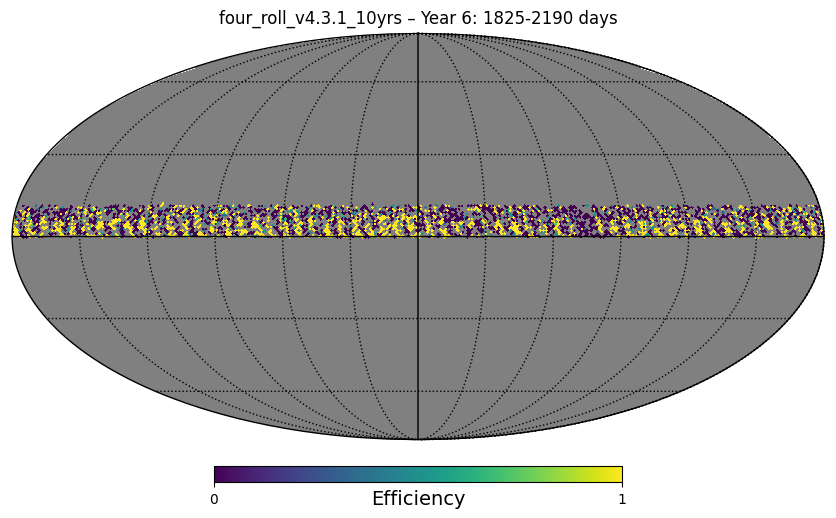

Saved mollview to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/four_roll_v4.3.1_10yrs_rd1em06_mollview_year6.png

 Year 7: 2190-2555 days
Sample Decs for four_roll_v4.3.1_10yrs, Year 7: [22.26476939 20.05024618 19.93737366 13.59274181 15.49401039 19.69404842
 18.89845029 12.97095974 13.41219734 12.12708303]
Injected GRBs in year 7: 4232


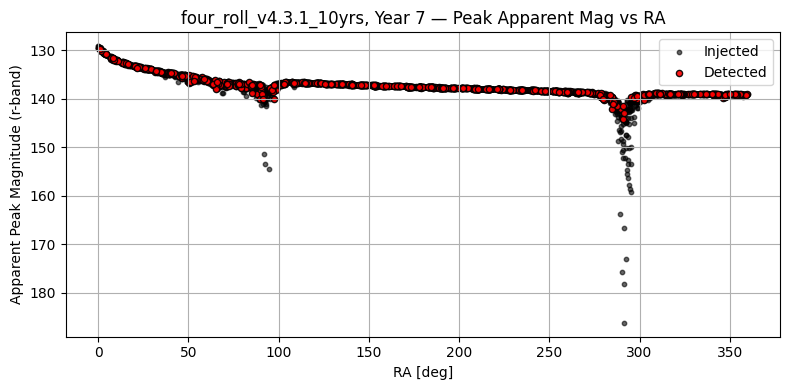

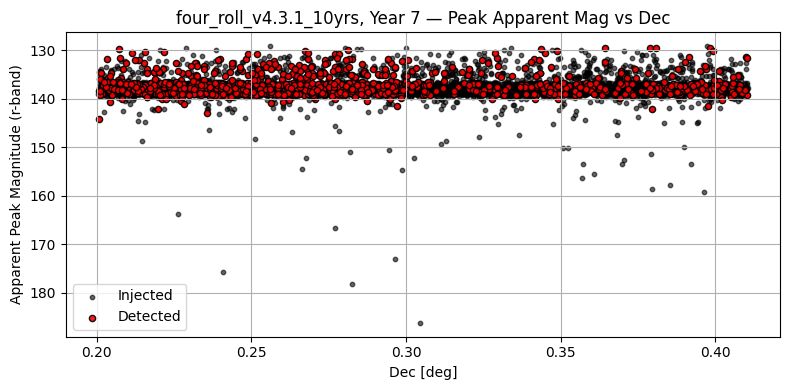


 Out of 4232 simulated GRB events, Rubin detected 1080 under the four_roll_v4.3.1_10yrs cadence.
   Of those, each event was observed in an average of 2.5 ± 1.5 filters.

 Filter-wise detections for four_roll_v4.3.1_10yrs, Year 7:
  u-band: 220 detections
  g-band: 425 detections
  r-band: 633 detections
  i-band: 582 detections
  z-band: 491 detections
  y-band: 320 detections
Saved detection summary to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/four_roll_v4.3.1_10yrs_rd1em06_combined_detection_summary.csv
Dec (rad) before mollview theta conversion: [0.38859353 0.34994281 0.34797281 0.2372381  0.2704215  0.34372599
 0.32984018 0.22638595 0.234087   0.21165753]
Theta range (mollview): 1.1603578335954934 1.3703079795042095
Any bad theta? False
Sample Decs (deg) for plotted map: [22.26476939 20.05024618 19.93737366 13.59274181 15.49401039 19.69404842
 18.89845029 12.97095974 13.41219734 12.12708303]


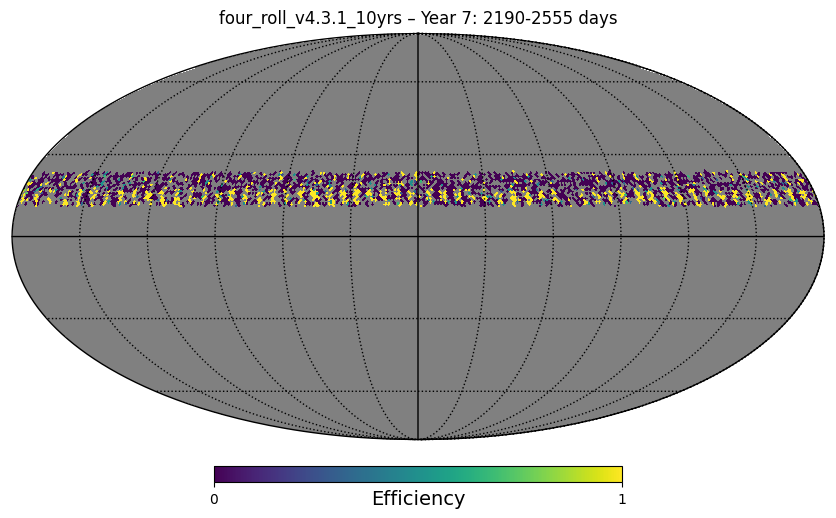

Saved mollview to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/four_roll_v4.3.1_10yrs_rd1em06_mollview_year7.png

 Year 8: 2555-2920 days
Sample Decs for four_roll_v4.3.1_10yrs, Year 8: [35.91252538 29.87716312 24.61977534 24.84859254 26.90357132 30.61828046
 33.70037714 31.77161695 26.18942918 30.38051321]
Injected GRBs in year 8: 4189


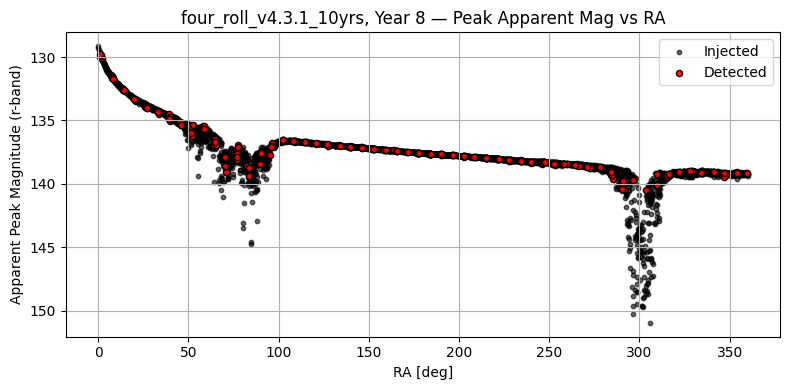

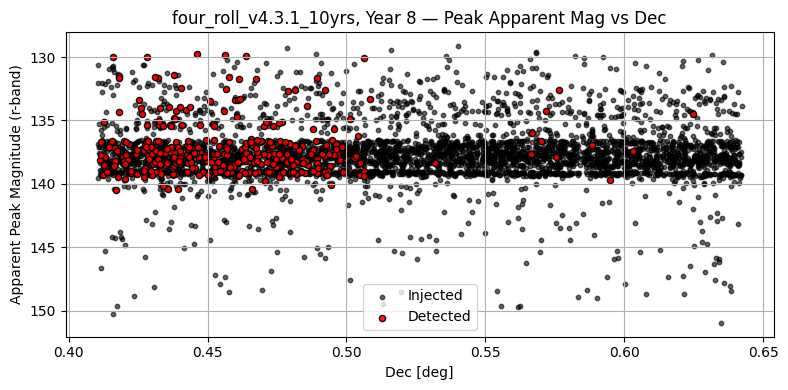


 Out of 4189 simulated GRB events, Rubin detected 341 under the four_roll_v4.3.1_10yrs cadence.
   Of those, each event was observed in an average of 2.0 ± 1.0 filters.

 Filter-wise detections for four_roll_v4.3.1_10yrs, Year 8:
  u-band: 0 detections
  g-band: 180 detections
  r-band: 188 detections
  i-band: 155 detections
  z-band: 151 detections
  y-band: 0 detections
Saved detection summary to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/four_roll_v4.3.1_10yrs_rd1em06_combined_detection_summary.csv
Dec (rad) before mollview theta conversion: [0.62679181 0.52145487 0.42969614 0.43368975 0.4695559  0.53438981
 0.58818254 0.55451932 0.45709177 0.53023998]
Theta range (mollview): 0.9286274954285934 1.1602744793541657
Any bad theta? False
Sample Decs (deg) for plotted map: [35.91252538 29.87716312 24.61977534 24.84859254 26.90357132 30.61828046
 33.70037714 31.77161695 26.18942918 30.38051321]


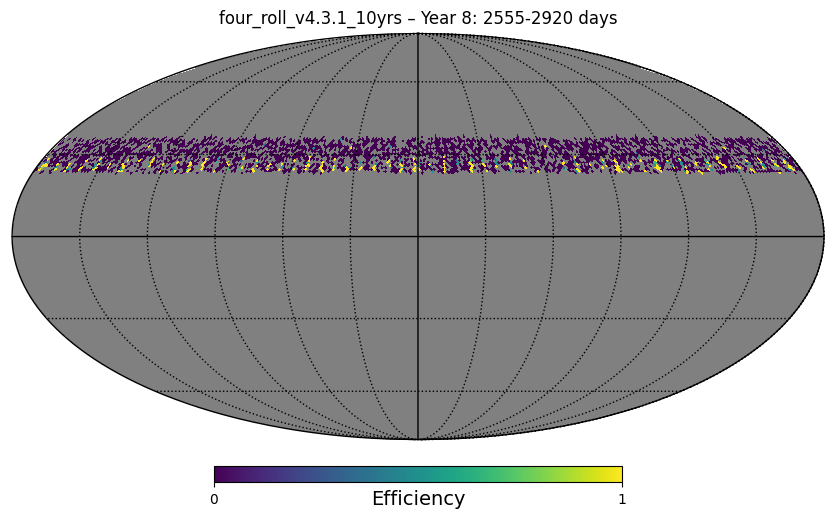

Saved mollview to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/four_roll_v4.3.1_10yrs_rd1em06_mollview_year8.png

 Year 9: 2920-3285 days
Sample Decs for four_roll_v4.3.1_10yrs, Year 9: [38.30425194 45.74715087 52.20035629 41.59557707 41.07918039 40.05832824
 39.99614471 52.8001435  44.31836554 48.92974579]
Injected GRBs in year 9: 4060


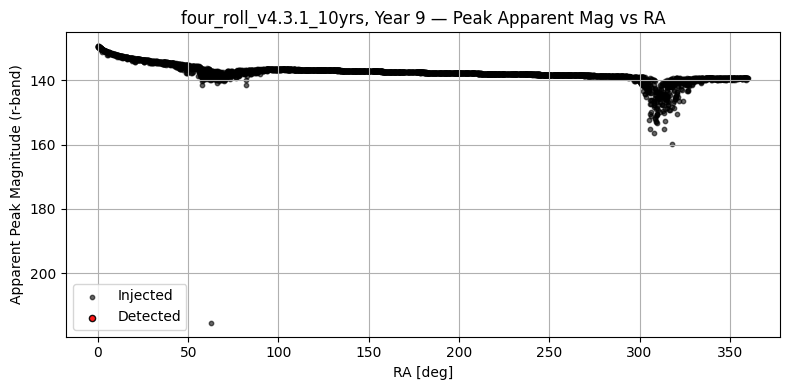

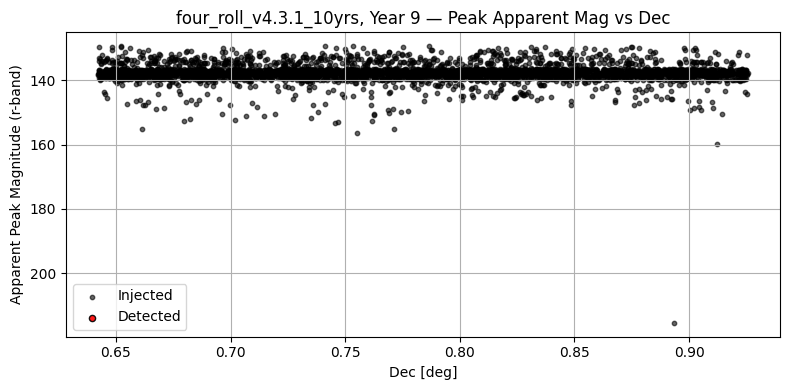


 Out of 4060 simulated GRB events, Rubin detected 0 under the four_roll_v4.3.1_10yrs cadence.
   Of those, each event was observed in an average of 0.0 ± 0.0 filters.

 Filter-wise detections for four_roll_v4.3.1_10yrs, Year 9:
  u-band: -- detections
  g-band: -- detections
  r-band: -- detections
  i-band: -- detections
  z-band: -- detections
  y-band: -- detections
Saved detection summary to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/four_roll_v4.3.1_10yrs_rd1em06_combined_detection_summary.csv
Dec (rad) before mollview theta conversion: [0.66853531 0.79843841 0.91106809 0.72597977 0.71696695 0.69914972
 0.69806441 0.92153635 0.7735014  0.85398517]
Theta range (mollview): 0.6452830037033669 0.928513033747547
Any bad theta? False
Sample Decs (deg) for plotted map: [38.30425194 45.74715087 52.20035629 41.59557707 41.07918039 40.05832824
 39.99614471 52.8001435  44.31836554 48.92974579]


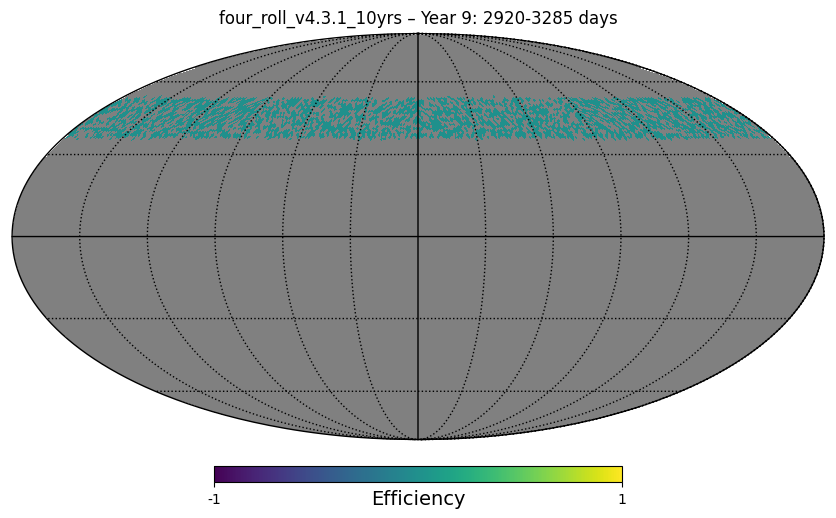

Saved mollview to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/four_roll_v4.3.1_10yrs_rd1em06_mollview_year9.png

 Year 10: 3285-3652 days
Sample Decs for four_roll_v4.3.1_10yrs, Year 10: [71.63615904 53.26916307 62.68733193 59.57709094 58.27986156 58.17575283
 70.02808174 62.71782265 66.46211096 76.70355675]
Injected GRBs in year 10: 4227


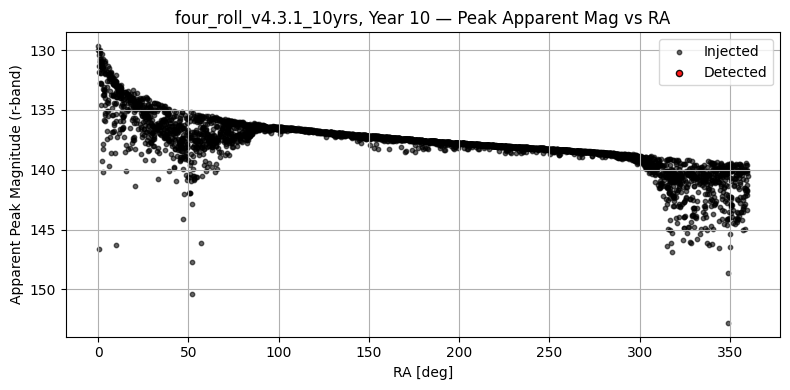

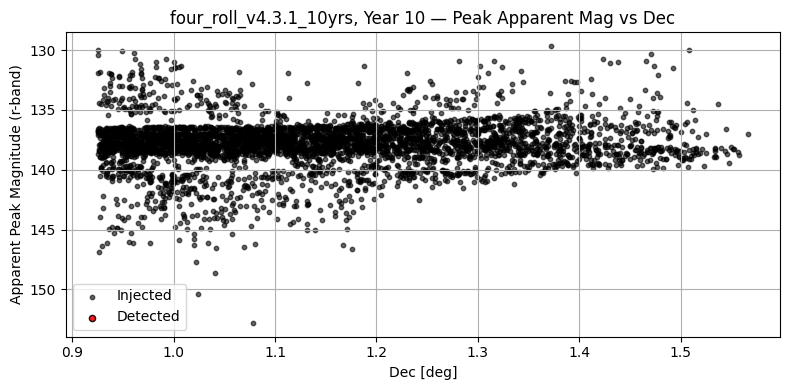


 Out of 4227 simulated GRB events, Rubin detected 0 under the four_roll_v4.3.1_10yrs cadence.
   Of those, each event was observed in an average of 0.0 ± 0.0 filters.

 Filter-wise detections for four_roll_v4.3.1_10yrs, Year 10:
  u-band: -- detections
  g-band: -- detections
  r-band: -- detections
  i-band: -- detections
  z-band: -- detections
  y-band: -- detections
Saved detection summary to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/four_roll_v4.3.1_10yrs_rd1em06_combined_detection_summary.csv
Dec (rad) before mollview theta conversion: [1.25028684 0.92972229 1.09410034 1.0398164  1.01717547 1.01535843
 1.2222206  1.0946325  1.15998266 1.33872961]
Theta range (mollview): 0.005006683166878023 0.6452042010210839
Any bad theta? False
Sample Decs (deg) for plotted map: [71.63615904 53.26916307 62.68733193 59.57709094 58.27986156 58.17575283
 70.02808174 62.71782265 66.46211096 76.70355675]


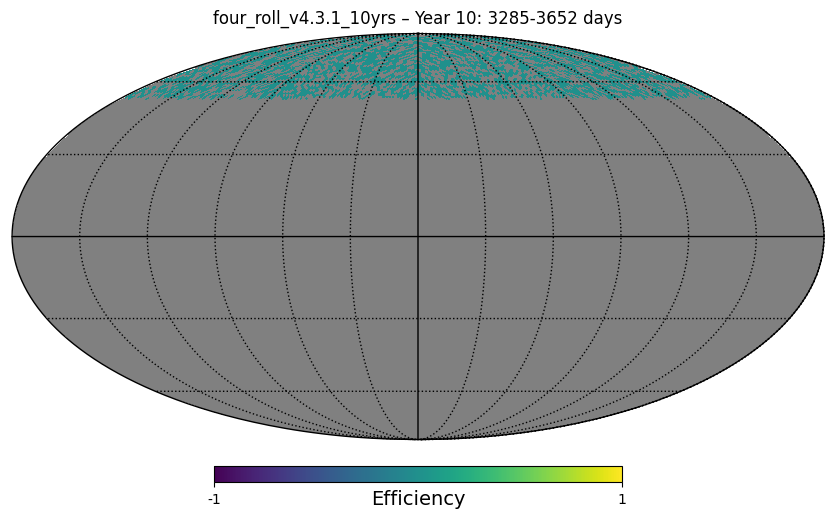

Saved mollview to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/four_roll_v4.3.1_10yrs_rd1em06_mollview_year10.png

=== Running GRB Detect-only for cadence: baseline_v4.3.1_10yrs ===

 Year 1: 1-365 days
Sample Decs for baseline_v4.3.1_10yrs, Year 1: [-58.24370758 -62.74411164 -66.1208334  -62.76790923 -63.84902273
 -57.12473915 -59.5082223  -65.60530746 -53.44912687 -74.83623871]
Injected GRBs in year 1: 4109


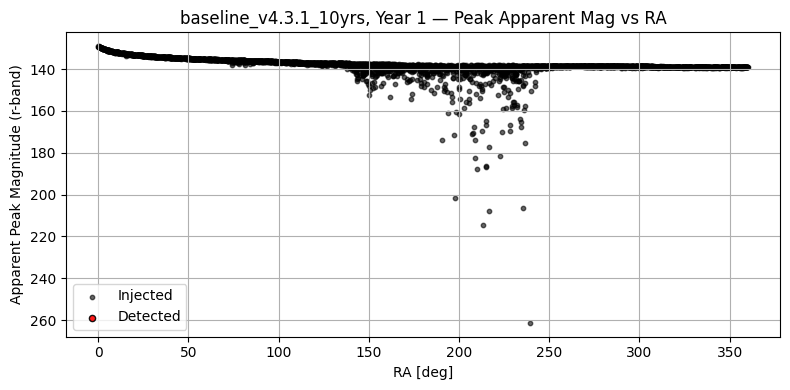

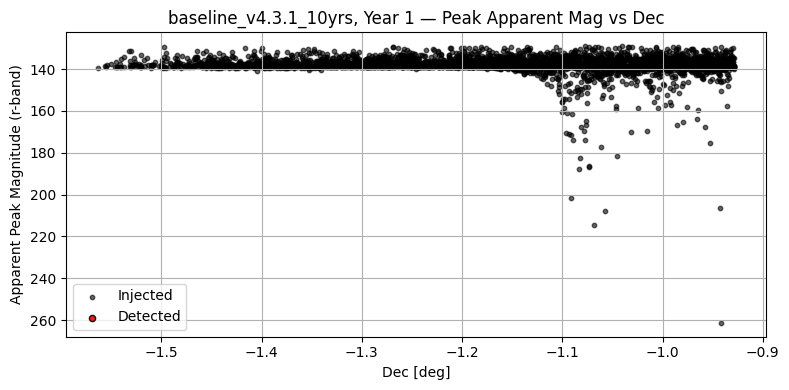


 Out of 4109 simulated GRB events, Rubin detected 0 under the baseline_v4.3.1_10yrs cadence.
   Of those, each event was observed in an average of 0.0 ± 0.0 filters.

 Filter-wise detections for baseline_v4.3.1_10yrs, Year 1:
  u-band: 0 detections
  g-band: 0 detections
  r-band: 0 detections
  i-band: 0 detections
  z-band: 0 detections
  y-band: 0 detections
Saved detection summary to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/baseline_v4.3.1_10yrs_rd1em06_combined_detection_summary.csv
Dec (rad) before mollview theta conversion: [-1.01654447 -1.09509133 -1.15402625 -1.09550668 -1.11437567 -0.99701478
 -1.03861441 -1.14502862 -0.93286325 -1.30613877]
Theta range (mollview): 2.4993338895702824 3.1343036580469836
Any bad theta? False
Sample Decs (deg) for plotted map: [-58.24370758 -62.74411164 -66.1208334  -62.76790923 -63.84902273
 -57.12473915 -59.5082223  -65.60530746 -53.44912687 -74.83623871]


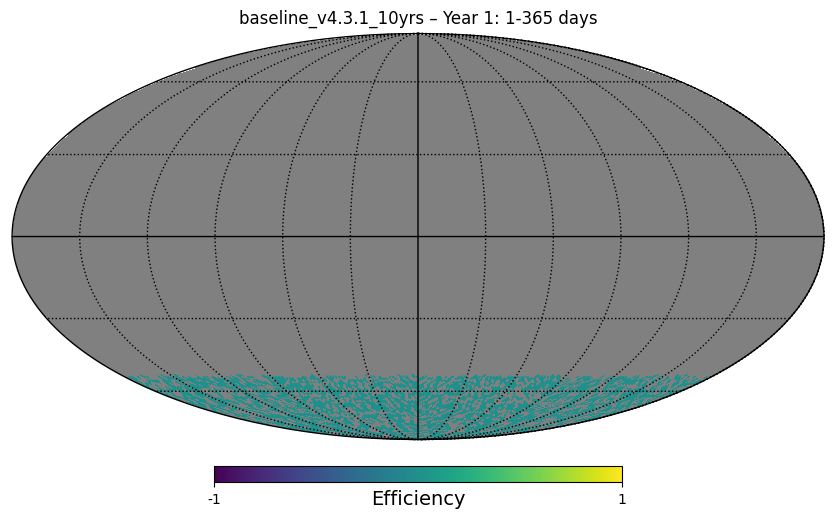

Saved mollview to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/baseline_v4.3.1_10yrs_rd1em06_mollview_year1.png

 Year 2: 365-730 days
Sample Decs for baseline_v4.3.1_10yrs, Year 2: [-37.58961361 -46.04753697 -43.6507887  -39.75546805 -41.92472403
 -41.92647465 -50.37255325 -39.20626852 -43.30166634 -47.20995375]
Injected GRBs in year 2: 4124


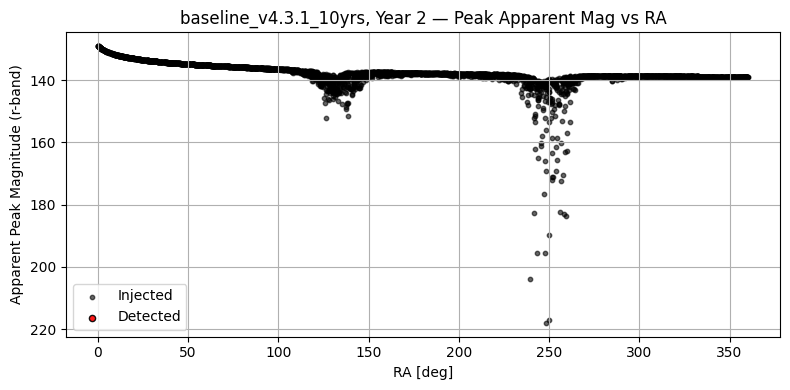

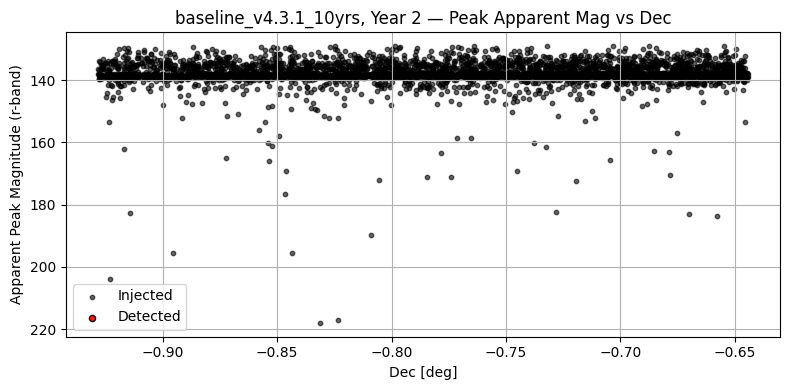


 Out of 4124 simulated GRB events, Rubin detected 0 under the baseline_v4.3.1_10yrs cadence.
   Of those, each event was observed in an average of 0.0 ± 0.0 filters.

 Filter-wise detections for baseline_v4.3.1_10yrs, Year 2:
  u-band: 0 detections
  g-band: 0 detections
  r-band: 0 detections
  i-band: 0 detections
  z-band: 0 detections
  y-band: 0 detections
Saved detection summary to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/baseline_v4.3.1_10yrs_rd1em06_combined_detection_summary.csv
Dec (rad) before mollview theta conversion: [-0.65606252 -0.80368113 -0.76184998 -0.69386381 -0.73172447 -0.73175503
 -0.87916691 -0.68427847 -0.75575665 -0.82396913]
Theta range (mollview): 2.2151239355329246 2.499023104513375
Any bad theta? False
Sample Decs (deg) for plotted map: [-37.58961361 -46.04753697 -43.6507887  -39.75546805 -41.92472403
 -41.92647465 -50.37255325 -39.20626852 -43.30166634 -47.20995375]


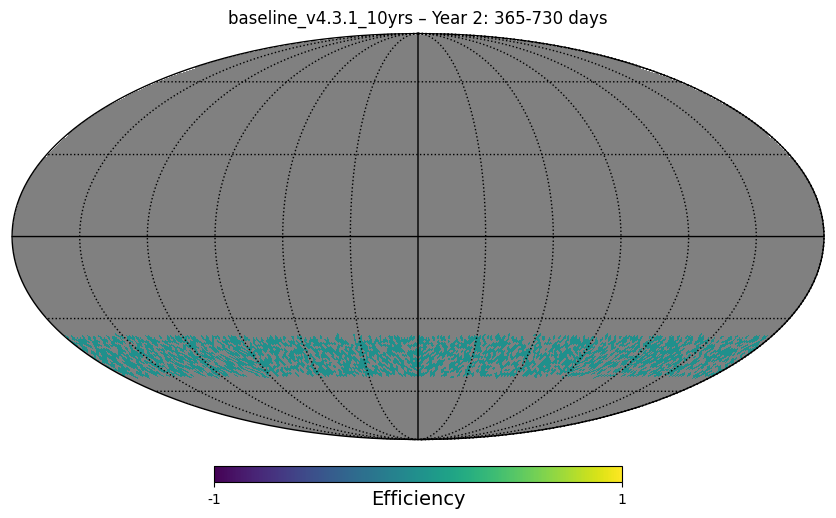

Saved mollview to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/baseline_v4.3.1_10yrs_rd1em06_mollview_year2.png

 Year 3: 730-1095 days
Sample Decs for baseline_v4.3.1_10yrs, Year 3: [-27.92413575 -25.2157328  -29.76373461 -30.98287387 -28.70089609
 -24.05734133 -29.84795275 -25.27793875 -31.97683347 -30.95558331]
Injected GRBs in year 3: 4185


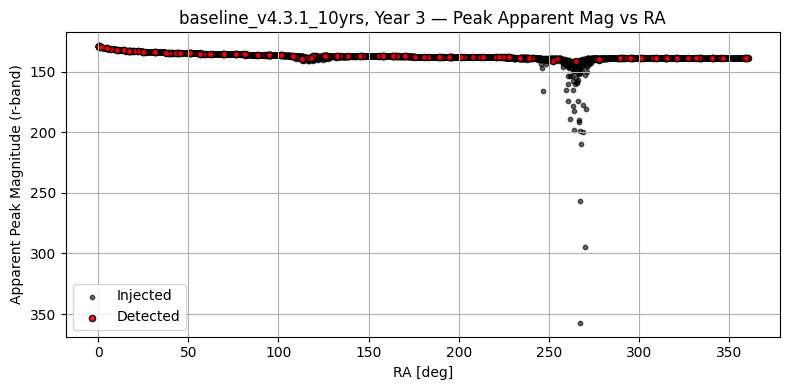

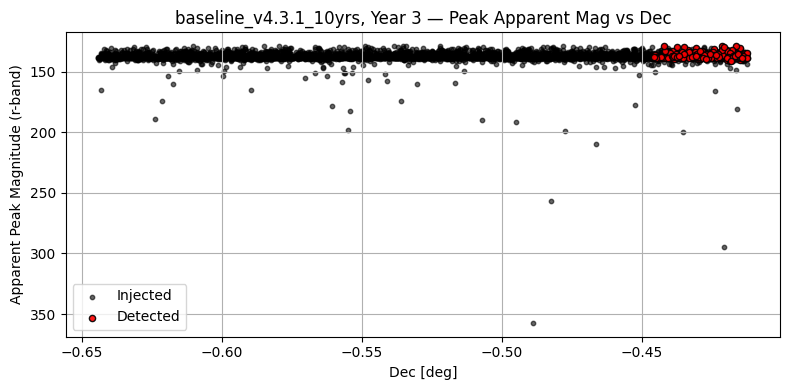


 Out of 4185 simulated GRB events, Rubin detected 180 under the baseline_v4.3.1_10yrs cadence.
   Of those, each event was observed in an average of 2.0 ± 1.2 filters.

 Filter-wise detections for baseline_v4.3.1_10yrs, Year 3:
  u-band: 60 detections
  g-band: 90 detections
  r-band: 92 detections
  i-band: 36 detections
  z-band: 48 detections
  y-band: 29 detections
Saved detection summary to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/baseline_v4.3.1_10yrs_rd1em06_combined_detection_summary.csv
Dec (rad) before mollview theta conversion: [-0.48736811 -0.44009756 -0.51947517 -0.54075316 -0.50092514 -0.41987982
 -0.52094505 -0.44118326 -0.55810103 -0.54027685]
Theta range (mollview): 1.983119363016083 2.215001968097945
Any bad theta? False
Sample Decs (deg) for plotted map: [-27.92413575 -25.2157328  -29.76373461 -30.98287387 -28.70089609
 -24.05734133 -29.84795275 -25.27793875 -31.97683347 -30.95558331]


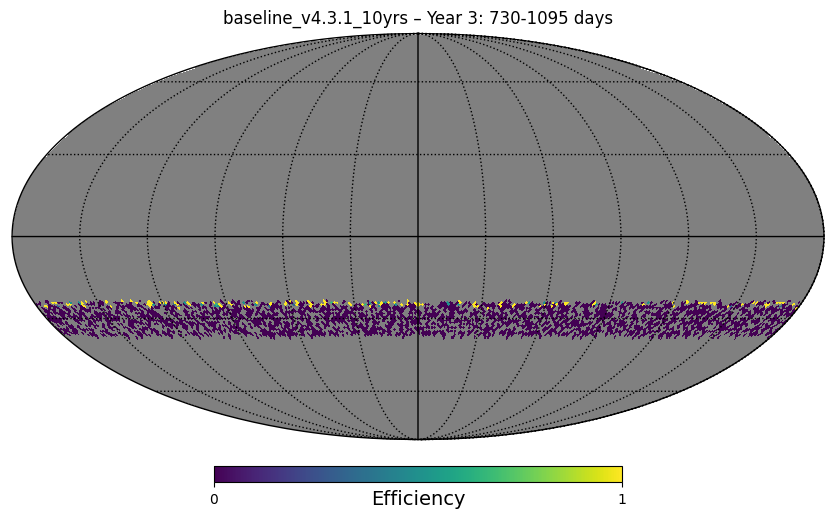

Saved mollview to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/baseline_v4.3.1_10yrs_rd1em06_mollview_year3.png

 Year 4: 1095-1460 days
Sample Decs for baseline_v4.3.1_10yrs, Year 4: [-13.58382677 -11.58830225 -12.55673759 -11.60792824 -13.05605594
 -17.3943472  -14.78942126 -13.72908707 -21.11447798 -17.1822162 ]
Injected GRBs in year 4: 4095


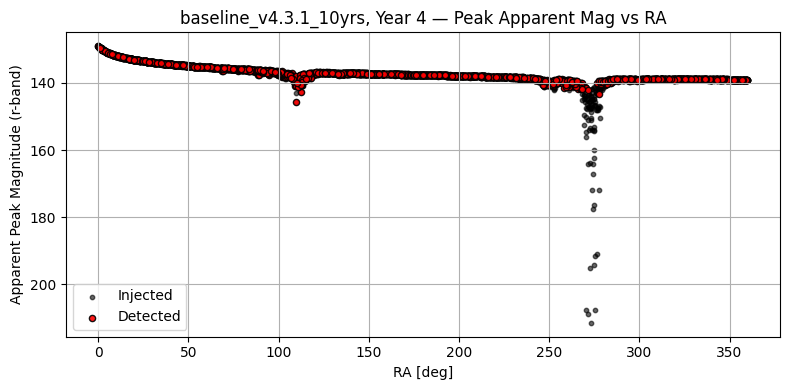

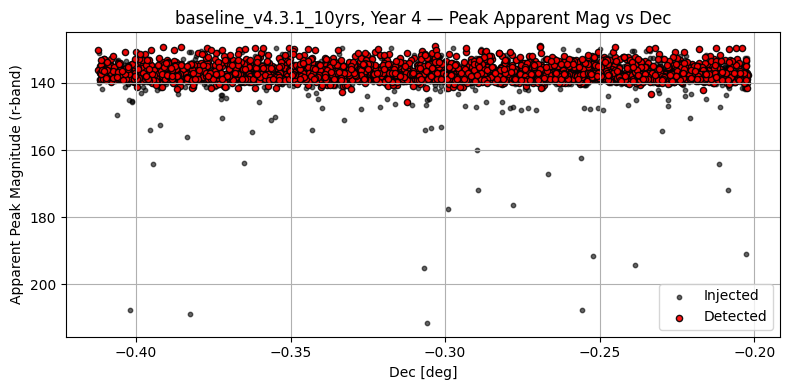


 Out of 4095 simulated GRB events, Rubin detected 2593 under the baseline_v4.3.1_10yrs cadence.
   Of those, each event was observed in an average of 2.7 ± 1.5 filters.

 Filter-wise detections for baseline_v4.3.1_10yrs, Year 4:
  u-band: 574 detections
  g-band: 840 detections
  r-band: 1473 detections
  i-band: 1441 detections
  z-band: 1384 detections
  y-band: 1183 detections
Saved detection summary to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/baseline_v4.3.1_10yrs_rd1em06_combined_detection_summary.csv
Dec (rad) before mollview theta conversion: [-0.2370825  -0.20225403 -0.21915641 -0.20259657 -0.22787116 -0.30358863
 -0.2581241  -0.23961777 -0.36851716 -0.29988625]
Theta range (mollview): 1.772951282466711 1.9830346782634376
Any bad theta? False
Sample Decs (deg) for plotted map: [-13.58382677 -11.58830225 -12.55673759 -11.60792824 -13.05605594
 -17.3943472  -14.78942126 -13.72908707 -21.11447798 -17.1822162 ]


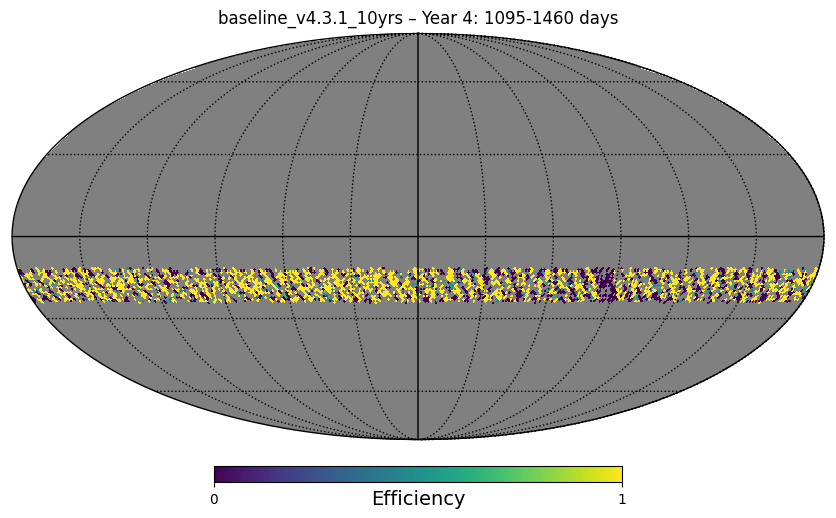

Saved mollview to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/baseline_v4.3.1_10yrs_rd1em06_mollview_year4.png

 Year 5: 1460-1825 days
Sample Decs for baseline_v4.3.1_10yrs, Year 5: [ -8.8026824   -1.84018935 -11.18643964  -5.86130526 -11.26196794
  -5.88085559  -5.23322161  -8.49817819 -11.14144693 -11.38996071]
Injected GRBs in year 5: 4255


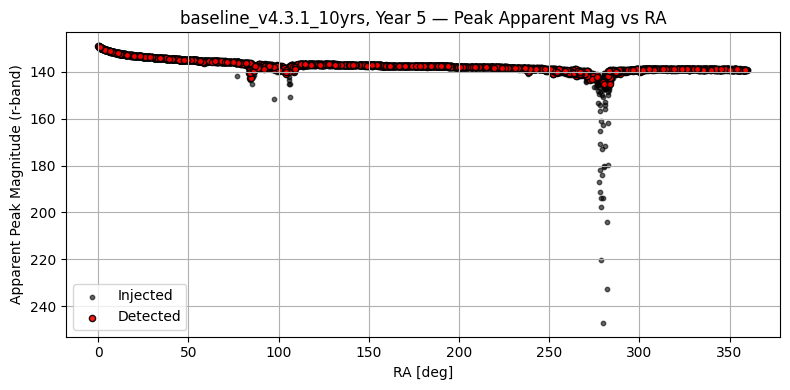

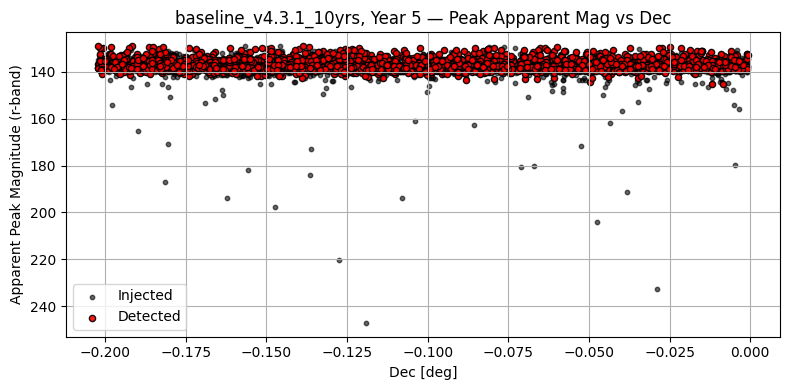


 Out of 4255 simulated GRB events, Rubin detected 2742 under the baseline_v4.3.1_10yrs cadence.
   Of those, each event was observed in an average of 2.9 ± 1.6 filters.

 Filter-wise detections for baseline_v4.3.1_10yrs, Year 5:
  u-band: 570 detections
  g-band: 1121 detections
  r-band: 1795 detections
  i-band: 1672 detections
  z-band: 1582 detections
  y-band: 1273 detections
Saved detection summary to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/baseline_v4.3.1_10yrs_rd1em06_combined_detection_summary.csv
Dec (rad) before mollview theta conversion: [-0.15363579 -0.03211736 -0.1952402  -0.10229908 -0.19655842 -0.10264029
 -0.09133695 -0.14832119 -0.19445493 -0.19879232]
Theta range (mollview): 1.571621201400821 1.7729350845151028
Any bad theta? False
Sample Decs (deg) for plotted map: [ -8.8026824   -1.84018935 -11.18643964  -5.86130526 -11.26196794
  -5.88085559  -5.23322161  -8.49817819 -11.14144693 -11.38996071]


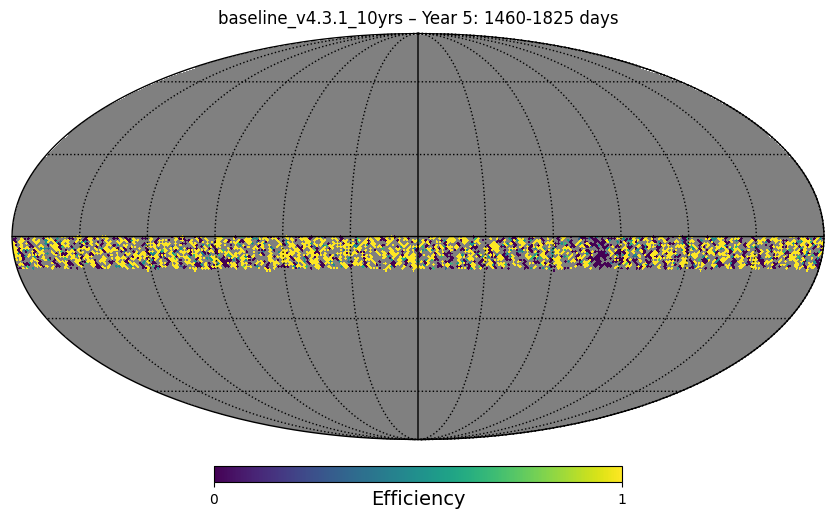

Saved mollview to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/baseline_v4.3.1_10yrs_rd1em06_mollview_year5.png

 Year 6: 1825-2190 days
Sample Decs for baseline_v4.3.1_10yrs, Year 6: [ 6.67141157  9.30215232  4.27979194  0.72633493  9.62577437  9.90684113
  6.51231332 11.30836593 10.70815281  3.54546425]
Injected GRBs in year 6: 4266


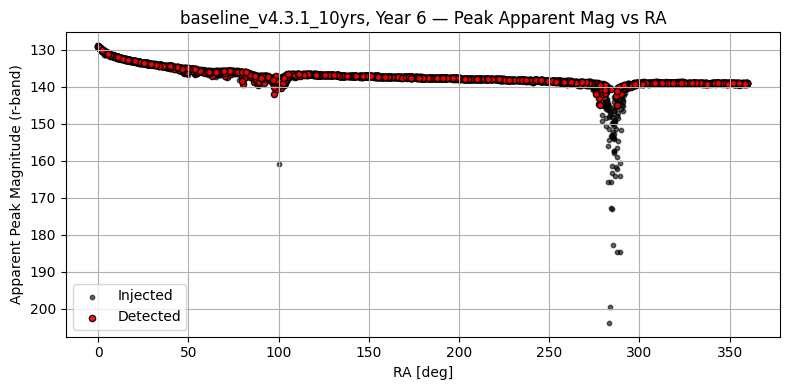

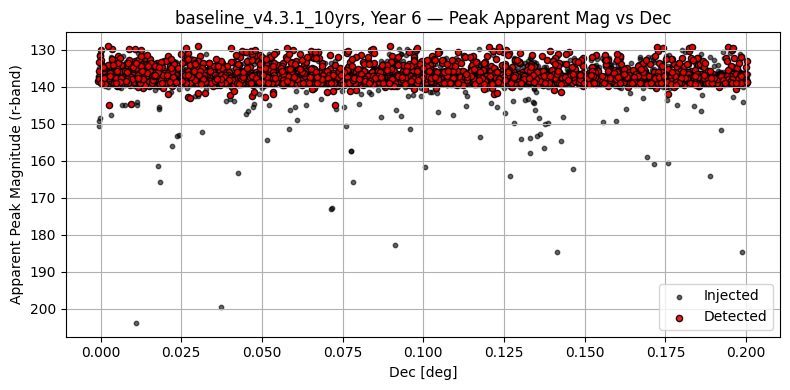


 Out of 4266 simulated GRB events, Rubin detected 2399 under the baseline_v4.3.1_10yrs cadence.
   Of those, each event was observed in an average of 2.7 ± 1.5 filters.

 Filter-wise detections for baseline_v4.3.1_10yrs, Year 6:
  u-band: 432 detections
  g-band: 915 detections
  r-band: 1446 detections
  i-band: 1416 detections
  z-band: 1223 detections
  y-band: 1006 detections
Saved detection summary to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/baseline_v4.3.1_10yrs_rd1em06_combined_detection_summary.csv
Dec (rad) before mollview theta conversion: [0.1164381  0.16235319 0.07469646 0.01267694 0.16800146 0.172907
 0.11366131 0.19736822 0.18689252 0.06188002]
Theta range (mollview): 1.3703747062788287 1.5715017138148422
Any bad theta? False
Sample Decs (deg) for plotted map: [ 6.67141157  9.30215232  4.27979194  0.72633493  9.62577437  9.90684113
  6.51231332 11.30836593 10.70815281  3.54546425]


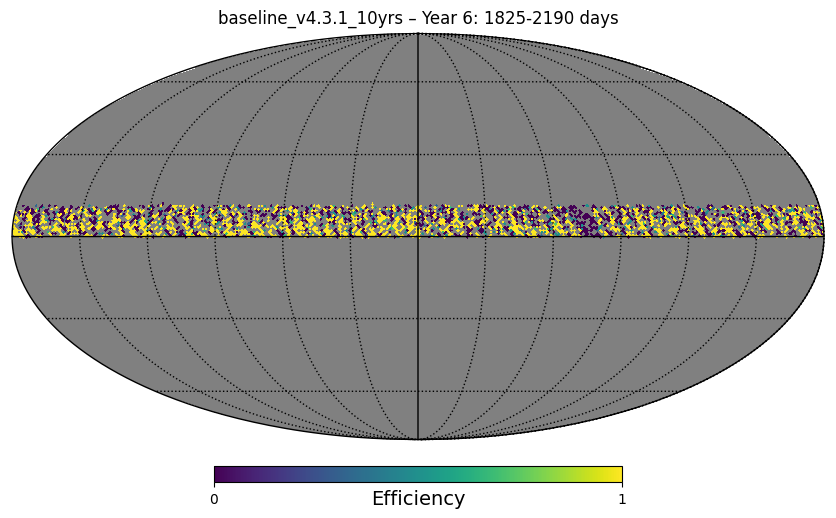

Saved mollview to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/baseline_v4.3.1_10yrs_rd1em06_mollview_year6.png

 Year 7: 2190-2555 days
Sample Decs for baseline_v4.3.1_10yrs, Year 7: [22.26476939 20.05024618 19.93737366 13.59274181 15.49401039 19.69404842
 18.89845029 12.97095974 13.41219734 12.12708303]
Injected GRBs in year 7: 4232


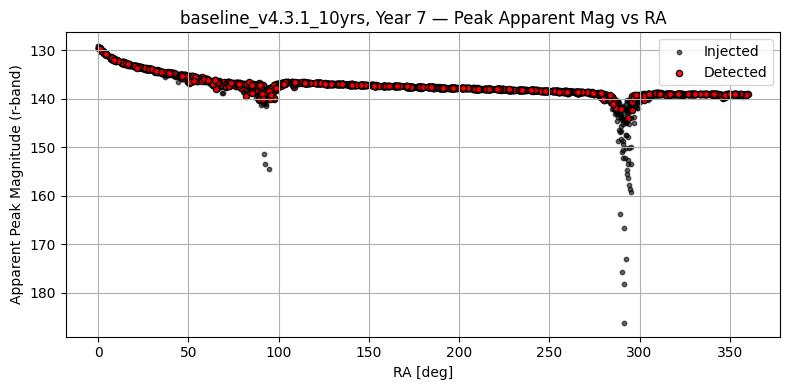

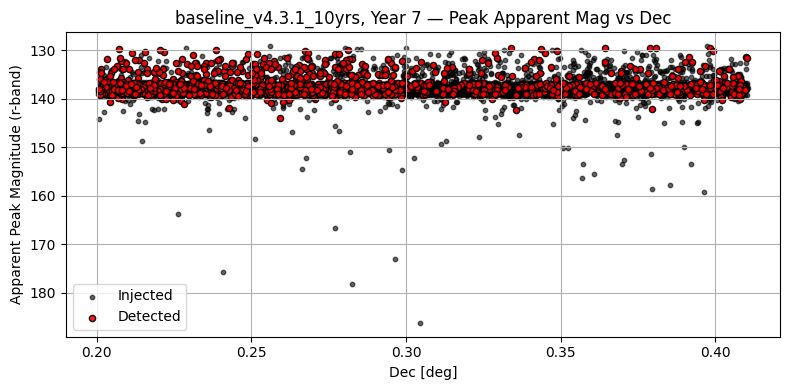


 Out of 4232 simulated GRB events, Rubin detected 1291 under the baseline_v4.3.1_10yrs cadence.
   Of those, each event was observed in an average of 2.3 ± 1.3 filters.

 Filter-wise detections for baseline_v4.3.1_10yrs, Year 7:
  u-band: 195 detections
  g-band: 566 detections
  r-band: 713 detections
  i-band: 653 detections
  z-band: 553 detections
  y-band: 287 detections
Saved detection summary to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/baseline_v4.3.1_10yrs_rd1em06_combined_detection_summary.csv
Dec (rad) before mollview theta conversion: [0.38859353 0.34994281 0.34797281 0.2372381  0.2704215  0.34372599
 0.32984018 0.22638595 0.234087   0.21165753]
Theta range (mollview): 1.1603578335954934 1.3703079795042095
Any bad theta? False
Sample Decs (deg) for plotted map: [22.26476939 20.05024618 19.93737366 13.59274181 15.49401039 19.69404842
 18.89845029 12.97095974 13.41219734 12.12708303]


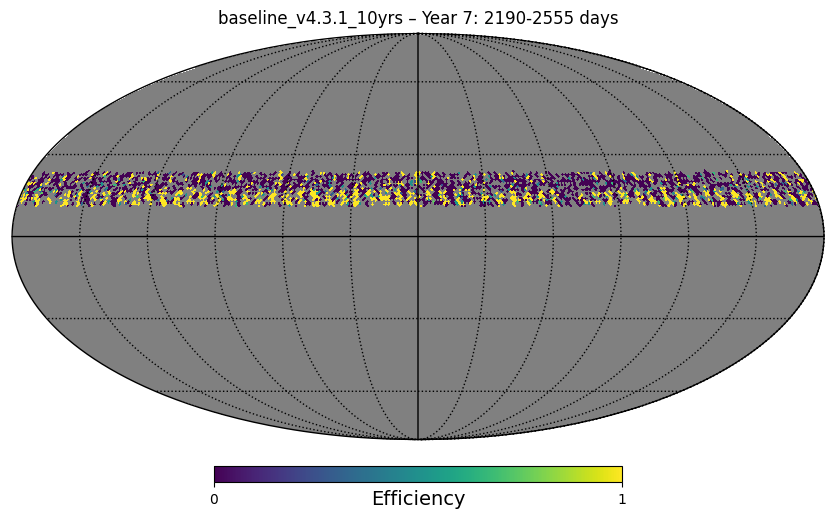

Saved mollview to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/baseline_v4.3.1_10yrs_rd1em06_mollview_year7.png

 Year 8: 2555-2920 days
Sample Decs for baseline_v4.3.1_10yrs, Year 8: [35.91252538 29.87716312 24.61977534 24.84859254 26.90357132 30.61828046
 33.70037714 31.77161695 26.18942918 30.38051321]
Injected GRBs in year 8: 4189


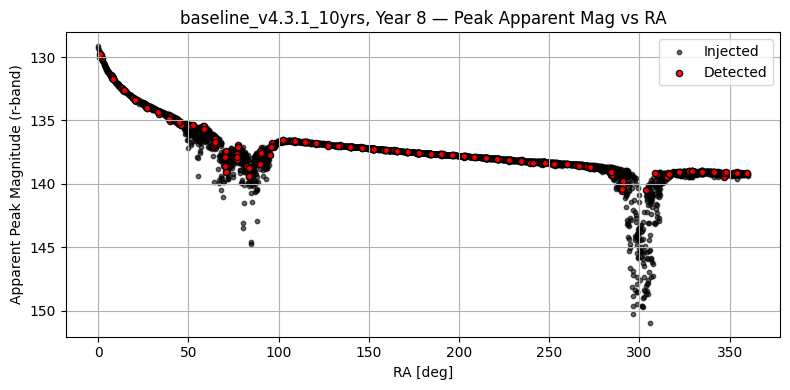

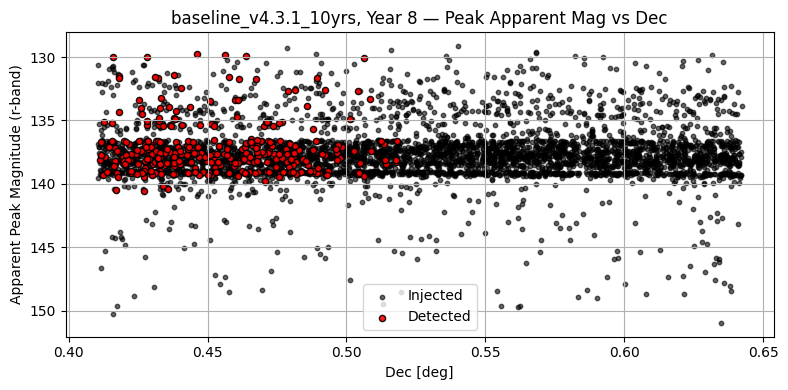


 Out of 4189 simulated GRB events, Rubin detected 331 under the baseline_v4.3.1_10yrs cadence.
   Of those, each event was observed in an average of 2.0 ± 0.9 filters.

 Filter-wise detections for baseline_v4.3.1_10yrs, Year 8:
  u-band: 0 detections
  g-band: 182 detections
  r-band: 220 detections
  i-band: 124 detections
  z-band: 131 detections
  y-band: 0 detections
Saved detection summary to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/baseline_v4.3.1_10yrs_rd1em06_combined_detection_summary.csv
Dec (rad) before mollview theta conversion: [0.62679181 0.52145487 0.42969614 0.43368975 0.4695559  0.53438981
 0.58818254 0.55451932 0.45709177 0.53023998]
Theta range (mollview): 0.9286274954285934 1.1602744793541657
Any bad theta? False
Sample Decs (deg) for plotted map: [35.91252538 29.87716312 24.61977534 24.84859254 26.90357132 30.61828046
 33.70037714 31.77161695 26.18942918 30.38051321]


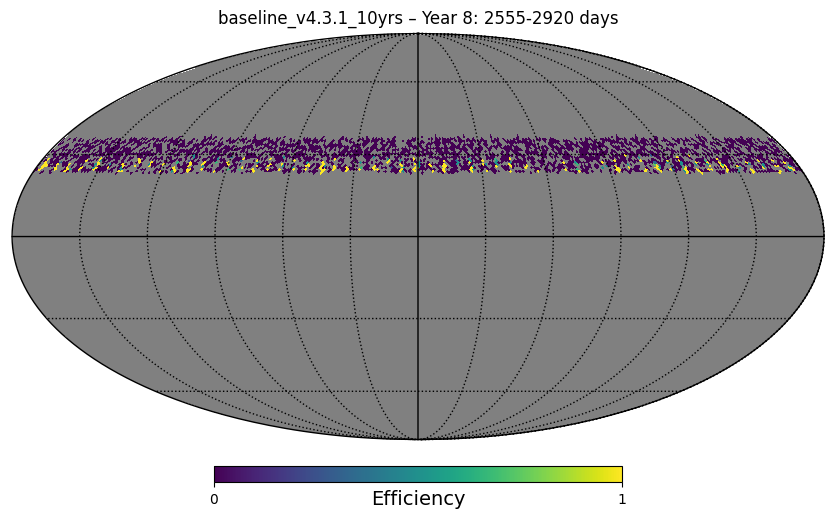

Saved mollview to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/baseline_v4.3.1_10yrs_rd1em06_mollview_year8.png

 Year 9: 2920-3285 days
Sample Decs for baseline_v4.3.1_10yrs, Year 9: [38.30425194 45.74715087 52.20035629 41.59557707 41.07918039 40.05832824
 39.99614471 52.8001435  44.31836554 48.92974579]
Injected GRBs in year 9: 4060


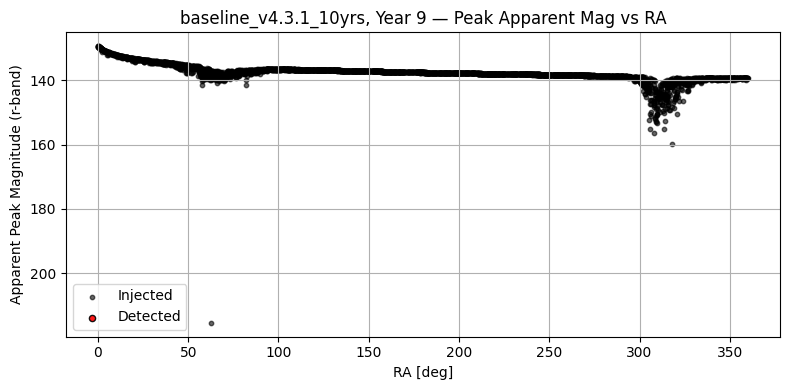

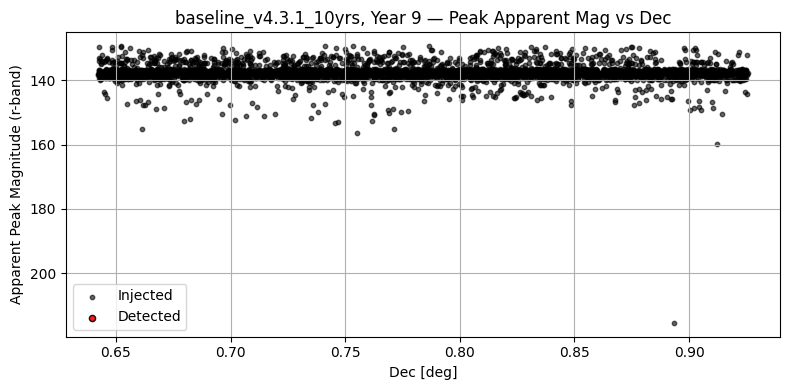


 Out of 4060 simulated GRB events, Rubin detected 0 under the baseline_v4.3.1_10yrs cadence.
   Of those, each event was observed in an average of 0.0 ± 0.0 filters.

 Filter-wise detections for baseline_v4.3.1_10yrs, Year 9:
  u-band: -- detections
  g-band: -- detections
  r-band: -- detections
  i-band: -- detections
  z-band: -- detections
  y-band: -- detections
Saved detection summary to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/baseline_v4.3.1_10yrs_rd1em06_combined_detection_summary.csv
Dec (rad) before mollview theta conversion: [0.66853531 0.79843841 0.91106809 0.72597977 0.71696695 0.69914972
 0.69806441 0.92153635 0.7735014  0.85398517]
Theta range (mollview): 0.6452830037033669 0.928513033747547
Any bad theta? False
Sample Decs (deg) for plotted map: [38.30425194 45.74715087 52.20035629 41.59557707 41.07918039 40.05832824
 39.99614471 52.8001435  44.31836554 48.92974579]


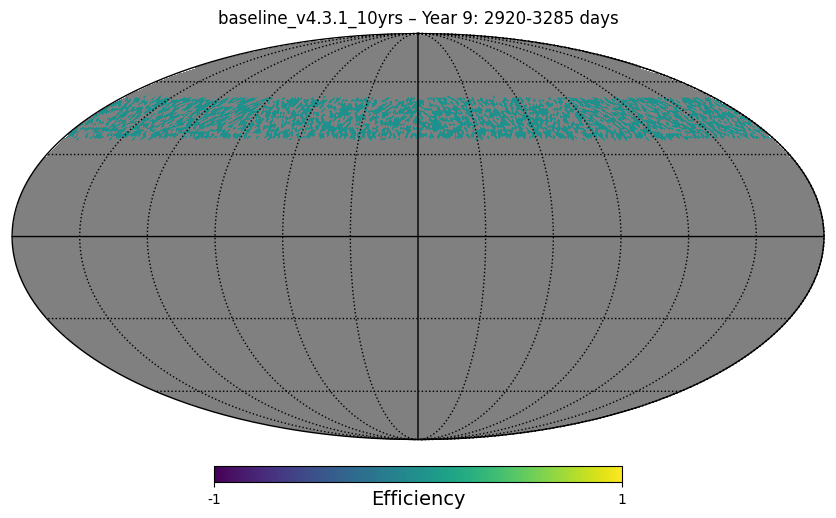

Saved mollview to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/baseline_v4.3.1_10yrs_rd1em06_mollview_year9.png

 Year 10: 3285-3652 days
Sample Decs for baseline_v4.3.1_10yrs, Year 10: [71.63615904 53.26916307 62.68733193 59.57709094 58.27986156 58.17575283
 70.02808174 62.71782265 66.46211096 76.70355675]
Injected GRBs in year 10: 4227


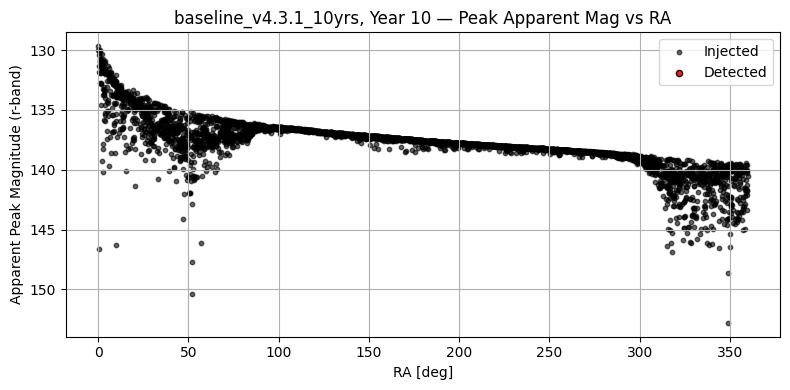

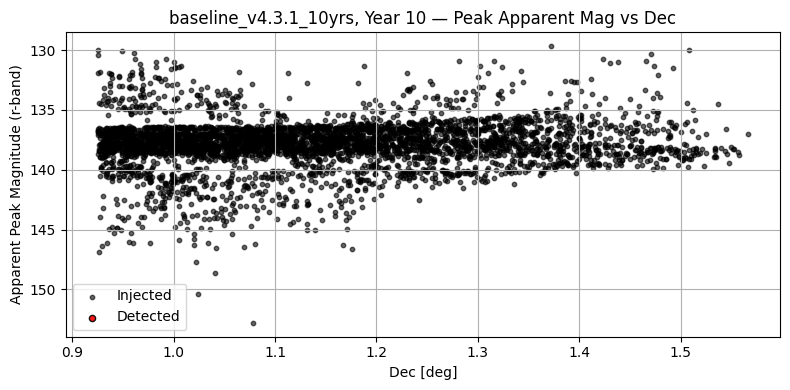


 Out of 4227 simulated GRB events, Rubin detected 0 under the baseline_v4.3.1_10yrs cadence.
   Of those, each event was observed in an average of 0.0 ± 0.0 filters.

 Filter-wise detections for baseline_v4.3.1_10yrs, Year 10:
  u-band: -- detections
  g-band: -- detections
  r-band: -- detections
  i-band: -- detections
  z-band: -- detections
  y-band: -- detections
Saved detection summary to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/baseline_v4.3.1_10yrs_rd1em06_combined_detection_summary.csv
Dec (rad) before mollview theta conversion: [1.25028684 0.92972229 1.09410034 1.0398164  1.01717547 1.01535843
 1.2222206  1.0946325  1.15998266 1.33872961]
Theta range (mollview): 0.005006683166878023 0.6452042010210839
Any bad theta? False
Sample Decs (deg) for plotted map: [71.63615904 53.26916307 62.68733193 59.57709094 58.27986156 58.17575283
 70.02808174 62.71782265 66.46211096 76.70355675]


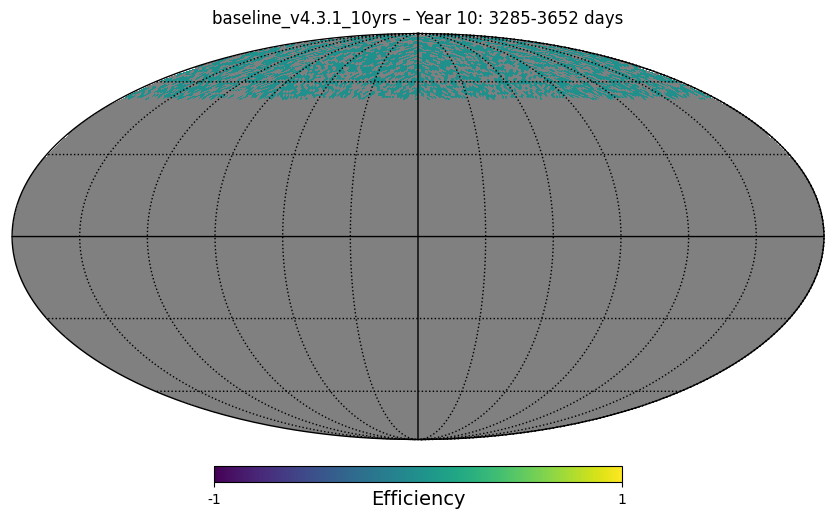

Saved mollview to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/baseline_v4.3.1_10yrs_rd1em06_mollview_year10.png


In [43]:
# ---- Configuration ----
cadences = ['four_roll_v4.3.1_10yrs', 'baseline_v4.3.1_10yrs']
rate_density = 1e-6
rate_str = f"rd{rate_density:.0e}".replace("-", "m")  # Example: 1e-8 to rd1e-8
filters = ['u', 'g', 'r', 'i', 'z', 'y']
grb_templates_file = "GRBAfterglow_templates.pkl"
full_grb_pop_file = os.path.join(out_dir_base, f"GRB_population_fixedpop_10yr_{rate_str}.pkl")
out_dir_base = os.path.join("AllTransient_MetricDetection", f"GRB_Afterglows_fixedpop_detectonly/{rate_str}")
dmin, dmax = 10, 1000
gal_lat_cut = None
year_intervals = [
    (1, 365), (365, 730), (730, 1095), (1095, 1460), (1460, 1825),
    (1825, 2190), (2190, 2555), (2555, 2920), (2920, 3285), (3285, 3652)
]

os.makedirs(os.path.dirname(full_grb_pop_file), exist_ok=True)

# ---- Template and Population Setup ----
if not os.path.exists(grb_templates_file):
    from local_GRBafterglows_metric import generateGRBAfterglowTemplates
    generateGRBAfterglowTemplates(save_to=grb_templates_file)
shared_lc_model = GRBAfterglowLC(load_from=grb_templates_file)

if not os.path.exists(full_grb_pop_file):
    _ = generateGRBPopSlicer(
        t_start=1, t_end=3652,
        seed=42, d_min=dmin, d_max=dmax,
        num_lightcurves=1000,
        gal_lat_cut=gal_lat_cut,
        save_to=full_grb_pop_file,
        rate_density=rate_density
    )

full_slicer = generateGRBPopSlicer(load_from=full_grb_pop_file)

print(f"Injecting population using rate_density = {rate_density:.1e}")

def filter_population_by_time(slicer, t_start, t_end):
    mask = (slicer.slice_points['peak_time'] >= t_start) & (slicer.slice_points['peak_time'] < t_end)
    ra = slicer.slice_points['ra'][mask]
    dec = slicer.slice_points['dec'][mask]
    new_slicer = UserPointsSlicer(ra=ra, dec=dec, badval=0)
    filtered_points = {k: v[mask] for k, v in slicer.slice_points.items()}
    filtered_points['sid'] = np.arange(len(ra))  # Reset to 0,1,...N-1
    new_slicer.slice_points = filtered_points
    return new_slicer


# ---- Main Loop over Cadences and Years ----
for cadence in cadences:
    print(f"\n=== Running GRB Detect-only for cadence: {cadence} ===")
    opsdb = f"{cadence}.db"
    outDir = os.path.join(out_dir_base, f"Metric_temp_{cadence}")
    os.makedirs(outDir, exist_ok=True)
    resultsDb = ResultsDb(out_dir=outDir)

    for yr, (t0, t1) in enumerate(year_intervals):
        print(f"\n Year {yr+1}: {t0}-{t1} days")
        slicer = filter_population_by_time(full_slicer, t0, t1)
        print(f"Sample Decs for {cadence}, Year {yr+1}: {np.degrees(slicer.slice_points['dec'][:10])}")
        n_events = len(slicer.slice_points['distance'])
        print(f"Injected GRBs in year {yr+1}: {n_events}")

        per_filter_metrics = OrderedDict()
        for filt in filters:
            detect = GRBAfterglowDetectMetric(
                metricName=f"GRB_Detect_{filt}", filter_include=[filt], lc_model=shared_lc_model
            )
            per_filter_metrics[f"GRB_Detect_{filt}"] = metric_bundles.MetricBundle(detect, slicer, '')

        pf_group = metric_bundles.MetricBundleGroup(per_filter_metrics, opsdb, out_dir=outDir, results_db=resultsDb)
        pf_group.run_all()
            
        # ---- Print peak m_app = M_abs + DM + A_band vs RA/DEC ----
        # Choose a representative filter ('r')
        filtername = 'r'
        ax1 = DustValues().ax1
        
        peak_mags = []
        ras = []
        decs = []
        detected_flags = []
        
        for i in range(n_events):
            ra = slicer.slice_points['ra'][i]
            dec = slicer.slice_points['dec'][i]
            d = slicer.slice_points['distance'][i]
            ebv = slicer.slice_points['ebv'][i]
            file_indx = slicer.slice_points['file_indx'][i]
        
            m_peak = shared_lc_model.interp(0, filtername, lc_indx=file_indx)
            A = ax1[filtername] * ebv
            dm = 5 * np.log10(d * 1e6) - 5
            m_app = m_peak + dm + A
        
            peak_mags.append(m_app)
            ras.append(ra)
            decs.append(dec)
            detected_flags.append(False)  # We'll update this next
        
        # --- Update detection flags ---
        for f in filters:
            vals = per_filter_metrics[f"GRB_Detect_{f}"].metric_values
            mask = ~vals.mask if hasattr(vals, 'mask') else np.ones(len(vals), dtype=bool)
            for i in range(n_events):
                if (vals[i] == 1) and mask[i]:
                    detected_flags[i] = True
        
        # --- Plot RA ---
        plt.figure(figsize=(8, 4))
        plt.scatter(ras, peak_mags, c='black', s=10, label='Injected', alpha=0.6)
        plt.scatter(np.array(ras)[detected_flags], np.array(peak_mags)[detected_flags],
                    c='red', s=20, label='Detected', alpha=0.9, edgecolors='black')
        plt.xlabel('RA [deg]')
        plt.ylabel(f'Apparent Peak Magnitude ({filtername}-band)')
        plt.title(f'{cadence}, Year {yr+1} — Peak Apparent Mag vs RA')
        plt.gca().invert_yaxis()
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        #plt.savefig(os.path.join(out_dir_base, f"{cadence}_{rate_str}_year{yr+1}_peakmag_vs_ra.png"))
        plt.show()
        
        # --- Plot Dec ---
        plt.figure(figsize=(8, 4))
        plt.scatter(decs, peak_mags, c='black', s=10, label='Injected', alpha=0.6)
        plt.scatter(np.array(decs)[detected_flags], np.array(peak_mags)[detected_flags],
                    c='red', s=20, label='Detected', alpha=0.9, edgecolors='black')
        plt.xlabel('Dec [deg]')
        plt.ylabel(f'Apparent Peak Magnitude ({filtername}-band)')
        plt.title(f'{cadence}, Year {yr+1} — Peak Apparent Mag vs Dec')
        plt.gca().invert_yaxis()
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        #plt.savefig(os.path.join(out_dir_base, f"{cadence}_{rate_str}_year{yr+1}_peakmag_vs_dec.png"))
        plt.show()


        # -- Filter-level detection count per event --
        n_filters_detected_per_event = np.array([
            sum(
                per_filter_metrics[f"GRB_Detect_{f}"].metric_values[i] == 1
                and not per_filter_metrics[f"GRB_Detect_{f}"].metric_values.mask[i]
                for f in filters
            )
            for i in range(n_events)
        ])
        
        # -- Which events were detected in ≥1 filter --
        detected_mask = n_filters_detected_per_event >= 1
        
        n_detected = np.sum(detected_mask)
        if n_detected > 0:
            mean_filters = np.mean(n_filters_detected_per_event[detected_mask])
            std_filters = np.std(n_filters_detected_per_event[detected_mask])
        else:
            mean_filters = 0.0
            std_filters = 0.0
        
        print(f"\n Out of {n_events} simulated GRB events, Rubin detected {n_detected} under the {cadence} cadence.")
        print(f"   Of those, each event was observed in an average of {mean_filters:.1f} ± {std_filters:.1f} filters.")


        print(f"\n Filter-wise detections for {cadence}, Year {yr+1}:")
        for f in filters:
            vals = per_filter_metrics[f"GRB_Detect_{f}"].metric_values
            mask = ~vals.mask if hasattr(vals, 'mask') else np.ones(len(vals), dtype=bool)
            found = np.sum((vals == 1) & mask)
            print(f"  {f}-band: {found} detections")


        # ---- Save Detection Summary CSV ----
        combined_csv = os.path.join(out_dir_base, f"{cadence}_{rate_str}_combined_detection_summary.csv")
        write_header = not os.path.exists(combined_csv)
        with open(combined_csv, "a") as out:
            if write_header:
                out.write("t_start,t_end,sid,ra,dec,peak_time,distance_Mpc,ebv,n_filters_detected,detected\n")
            for i in range(n_events):
                n_filters_detected = sum(
                    int((not per_filter_metrics[f"GRB_Detect_{f}"].metric_values.mask[i]) and
                        (per_filter_metrics[f"GRB_Detect_{f}"].metric_values[i] == 1))
                    for f in filters
                )
                detected = int(n_filters_detected >= 1)
                out.write(f"{t0},{t1},{i},{slicer.slice_points['ra'][i]:.5f},{slicer.slice_points['dec'][i]:.5f},"
                          f"{slicer.slice_points['peak_time'][i]:.2f},{slicer.slice_points['distance'][i]:.2f},"
                          f"{slicer.slice_points['ebv'][i]:.3f},{n_filters_detected},{detected}\n")

        print(f"Saved detection summary to {combined_csv}")

        # ---- Mollview Plot (All Filter Detections) ----
        nside = slicer.nside if hasattr(slicer, 'nside') else 64
        npix = hp.nside2npix(nside)
        injected_map = np.zeros(npix)
        detected_map = np.zeros(npix)

        ra_rad = np.radians(slicer.slice_points['ra'])
        dec_rad = slicer.slice_points['dec']
        print("Dec (rad) before mollview theta conversion:", dec_rad[:10])
        theta = 0.5 * np.pi - dec_rad
        phi = ra_rad
        pix_inds = hp.ang2pix(nside, theta, phi)
        print("Theta range (mollview):", theta.min(), theta.max())
        print("Any bad theta?", np.any(np.isnan(theta)) or np.any(theta < 0) or np.any(theta > np.pi))

        for i, pix in enumerate(pix_inds):
            injected_map[pix] += 1
            if any(per_filter_metrics[f"GRB_Detect_{f}"].metric_values[i] == 1
                   and not per_filter_metrics[f"GRB_Detect_{f}"].metric_values.mask[i]
                   for f in filters):
                detected_map[pix] += 1

        eff_map = np.zeros(npix)
        mask = injected_map > 0
        eff_map[mask] = detected_map[mask] / injected_map[mask]
        eff_map[~mask] = hp.UNSEEN

        hp.mollview(
            eff_map,
            title=f"{cadence} – Year {yr+1}: {t0}-{t1} days",
            unit='Efficiency',
            cmap='viridis'
        )
        print("Sample Decs (deg) for plotted map:", np.degrees(slicer.slice_points['dec'][:10]))

        hp.graticule()
        png_path = os.path.join(out_dir_base, f"{cadence}_{rate_str}_mollview_year{yr+1}.png")
        #plt.savefig(png_path, dpi=150)
        plt.show()  
        plt.close()
        print(f"Saved mollview to {png_path}")

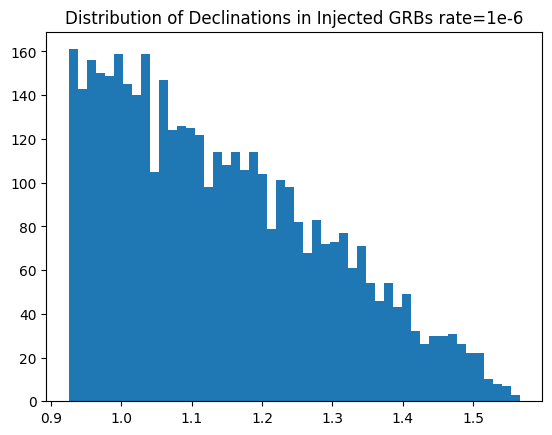

In [41]:
plt.hist(slicer.slice_points['dec'], bins=50)
plt.title("Distribution of Declinations in Injected GRBs rate=1e-6")
plt.show()


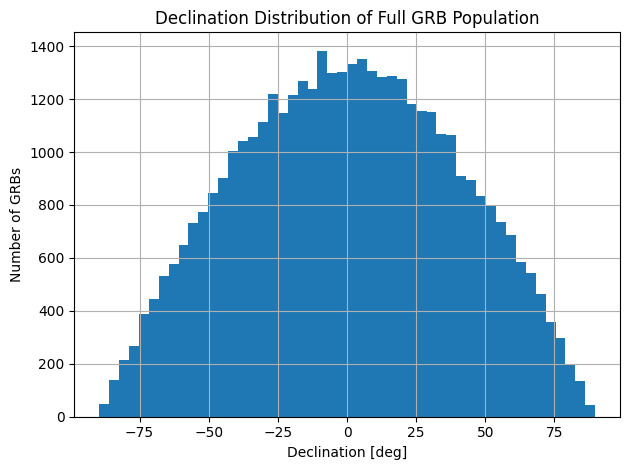

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Just once, right after loading the full population
decs_rad = full_slicer.slice_points['dec']
decs_deg = np.degrees(decs_rad)

plt.hist(decs_deg, bins=50)
plt.xlabel("Declination [deg]")
plt.ylabel("Number of GRBs")
plt.title("Declination Distribution of Full GRB Population")
plt.grid(True)
plt.tight_layout()
plt.show()


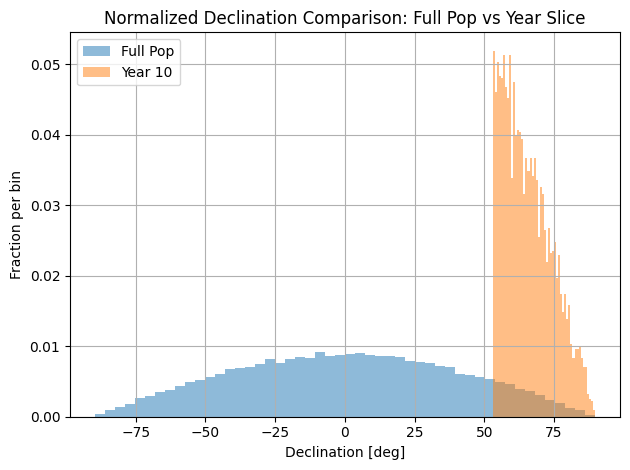

In [49]:
plt.hist(np.degrees(full_slicer.slice_points['dec']), bins=50, alpha=0.5, label='Full Pop', density=True)
plt.hist(np.degrees(slicer.slice_points['dec']), bins=50, alpha=0.5, label=f'Year {yr+1}', density=True)
plt.xlabel("Declination [deg]")
plt.ylabel("Fraction per bin")
plt.title("Normalized Declination Comparison: Full Pop vs Year Slice")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
